In [42]:
from openai import OpenAI
import os
from dotenv import load_dotenv
import json
import PyPDF2

In [43]:
def load_papers_from_jsonl(file_path):
    papers = []
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                try:
                    paper = json.loads(line.strip())
                    papers.append(paper)
                except json.JSONDecodeError:
                    print(f"Skipping a line due to JSON decoding error.")
    except FileNotFoundError:
        print(f"The file {file_path} was not found.")
    except Exception as e:
        print(f"An unexpected error occurred while reading the file: {e}")

    print(f"Loaded {len(papers)} papers from {file_path}.")
    return papers

# Specify the path to your JSONL file
jsonl_file_path = "extracted_test_papers_new_NEWEST.jsonl"

# Load papers
papers = load_papers_from_jsonl(jsonl_file_path)

# Display loaded papers (Optional)
for i, paper in enumerate(papers[:5]):  # Limit display to the first 5 papers for readability
    print(f"Paper {i+1}:")
    print(f"Title: {paper.get('title', 'No title provided')}")
    print("Content:")
    print(paper.get('content', 'No content provided')[:500])  # Print first 500 characters of content
    print("-" * 50)  # Separator


Loaded 1271 papers from extracted_test_papers_new_NEWEST.jsonl.
Paper 1:
Title: NetCA T: Practical Cache Attacks from the Network
Content:
NetCA T: Practical Cache Attacks from the Network
Michael Kurth∗§, Ben Gras∗, Dennis Andriesse∗, Cristiano Giuffrida∗, Herbert Bos∗, and Kaveh Razavi∗
∗Department of Computer Science
Vrije Universiteit Amsterdam, The Netherlands
m.kurth@vu.nl, beng@cs.vu.nl, da.andriesse@few.vu.nl
{kaveh, herbertb, giuffrida}@cs.vu.nl§Department of Computer Science
ETH Zurich, Switzerland
kurthm@ethz.ch
Abstract —Increased peripheral performance is causing strain
on the memory subsystem of modern processors. For
--------------------------------------------------
Paper 2:
Title: (Un)informed Consent: Studying GDPR Consent Notices in the
Content:
(Un)informed Consent: Studying GDPR Consent Notices in the
Field
Christine Utz
Ruhr-Universität Bochum
Bochum, Germany
christine.utz@rub.deMartin Degeling
Ruhr-Universität Bochum
Bochum, Germany
martin.degeling@rub.deSascha F

In [4]:
import json
from transformers import GPT2Tokenizer

def load_papers_from_jsonl(file_path):
    papers = []
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                papers.append(json.loads(line.strip()))
    except Exception as e:
        print(f"Error loading or processing file: {e}")
    return papers

def calculate_total_tokens(papers):
    tokenizer = GPT2Tokenizer.from_pretrained("gpt2")  # Loading GPT-2 tokenizer
    total_tokens = 0
    for paper in papers:
        content = paper.get('content', '')
        tokens = tokenizer(content, add_special_tokens=False)['input_ids']  # Tokenize without adding special tokens
        total_tokens += len(tokens)
        print(f"Paper: {paper['title']} - Tokens: {len(tokens)}")
    return total_tokens

# Specify the path to your JSONL file
jsonl_file_path = "extracted_test_papers_new_NEWEST.jsonl"

# Load papers
papers = load_papers_from_jsonl(jsonl_file_path)

# Calculate total tokens
total_tokens = calculate_total_tokens(papers)
print(f"Total number of tokens in the dataset: {total_tokens}")


None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
Token indices sequence length is longer than the specified maximum sequence length for this model (26165 > 1024). Running this sequence through the model will result in indexing errors


Paper: NetCA T: Practical Cache Attacks from the Network - Tokens: 26165
Paper: (Un)informed Consent: Studying GDPR Consent Notices in the - Tokens: 25567
Paper: (Un)linkable Pseudonyms for Governmental Databases - Tokens: 22965
Paper: ObliviSync: Practical Oblivious - Tokens: 24117
Paper: SYMTCP: Eluding Stateful Deep Packet Inspection - Tokens: 28403
Paper: Interpretable Federated Transformer Log Learning - Tokens: 23609
Paper: How to Count Bots - Tokens: 22539
Paper: Testability Tarpits: the Impact of Code Patterns - Tokens: 24038
Paper: FedCRI: Federated Mobile Cyber-Risk Intelligence - Tokens: 18979
Paper: Hybrid Trust Multi-party Computation with - Tokens: 32704
Paper: A Lightweight IoT Cryptojacking Detection - Tokens: 23031
Paper: Hiding My Real Self! Protecting Intellectual - Tokens: 21336
Paper: Towards Precise Reporting of - Tokens: 32222
Paper: Understanding and Analyzing Appraisal Systems in - Tokens: 30263
Paper: Understanding Route Origin Validation (ROV) - Tokens: 23597

In [44]:
load_dotenv('api_key.env')  # load all the variables from '.env' file
api_key=os.getenv("OPENAI_API_KEY")

In [45]:
# Pre-existing list of datasets
existing_datasets = [
    
    {"unique_id": 1, "dataset_name": "NSL-KDD", "contributors": "Ghulam Mohi-ud-din", 
     "doi": "https://dx.doi.org/10.21227/425a-3e55", 
     "url": None},
    
    {"unique_id": 2, "dataset_name": "UNSW-NB15", "contributors": "Moustafa, Nour, and Jill Slay", 
     "doi": None, 
     "url": "https://research.unsw.edu.au/projects/unsw-nb15-dataset"},
    
    {"unique_id": 3, "dataset_name": "CICIDS2017", "contributors": "Iman Sharafaldin, Arash Habibi Lashkari, and Ali A. Ghorbani", 
     "doi": None, 
     "url": "https://www.unb.ca/cic/datasets/ids-2017.html"},
    
    {"unique_id": 4, "dataset_name": "BoT-IoT dataset", "contributors": "Nickolaos Koroniotis, Nour Moustafa, Elena Sitnikova, Benjamin Turnbull",  
     "doi": None, 
     "url": "https://research.unsw.edu.au/projects/bot-iot-dataset"},
     {"unique_id": 5, "dataset_name": "Drebin", "contributors": "Daniel Arp, Michael Spreitzenbarth, Malte Hubner , Hugo Gascon, and Konrad Rieck",  
     "doi": None, 
     "url": "https://www.ndss-symposium.org/wp-content/uploads/2017/09/11_3_1.pdf"}
]


In [17]:
import json

def generate_system_prompt(paper, task, dataset_names):
    title = paper['title']
    content = paper['content']

    # Extract title first and then reuse in other tasks
    if task == "title":
        return f"""
        You are tasked with extracting the title of the provided cybersecurity paper.
        
        Guidelines:
        \t1. The title is often at the top of the first page.
        \t2. Extract the title in its entirety.
        
        Here is the paper content:
        <Start of Paper Content>
        {content}
        <End of Paper Content>
        
        Your response must be returned in the following JSON format:
        {{
            "title": "Title of the paper here"
        }}

        Your response: """

    elif task == "authors_name":
        return f"""
        You are tasked with extracting the authors' names from the provided cybersecurity paper.
        
        Guidelines:
        \t1. The authors' names are usually listed directly below the title.
        \t2. Extract all the authors, separated by commas.
        
        Here is the paper content:
        <Start of Paper Content>
        {content}
        <End of Paper Content>
        
        Your response must be returned in the following JSON format:
        {{
            "authors": "Comma-separated list of authors' names here"
        }}

        Your response: """

    elif task == "conference_name":
        return f"""
        You are tasked with extracting the conference name where the paper was presented.
        
        Guidelines:
        \t1. The conference name is usually found at the top or bottom of the first page.
        \t2. Use the short form (USS, NDSS, ACSAC, SP, CCS) if applicable.
        
        Here is the paper content:
        <Start of Paper Content>
        {content}
        <End of Paper Content>
        
        Your response must be returned in the following JSON format:
        {{
            "conference": "Short form of conference name (USS, NDSS, ACSAC, SP, CCS)"
        }}

        Your response: """

    elif task == "published_year":
        return f"""
        You are tasked with extracting the year of publication from the provided cybersecurity paper.
        
        Guidelines:
        \t1. The year of publication is usually found near the conference name or at the bottom of the first page.
        
        Here is the paper content:
        <Start of Paper Content>
        {content}
        <End of Paper Content>
        
        Your response must be returned in the following JSON format:
        {{
            "year": "Year of publication here"
        }}
        
        Your response: """

    elif task == "school_institution":
        return f"""
        You are tasked with extracting the school or institution name(s) associated with the authors of the provided cybersecurity paper.
        
        Guidelines:
        \t1. The institution or school is often listed near the authors' names, either directly below or in the footer of the first page.
        \t2. Extract all institutions mentioned, separated by commas if there are multiple.
        
        Here is the paper content:
        <Start of Paper Content>
        {content}
        <End of Paper Content>
        
        Your response must be returned in the following JSON format:
        {{
            "school": "Comma-separated list of schools/institutions"
        }}
        
        Your response: """
     
    # Use the title extracted earlier in the remaining tasks
    elif task == "domain":
        title = paper['title']  # Use the extracted title

        research_domains_list = [
            "botnet detection",
            "privacy-preserving computation",
            "Advanced Persistent Threat Detection",
            "Network Security", 
            "Network Intrusion Detection Systems(NIDS)"
            "adversarial data mining",
            "Adversarial Social Networking"
            "IoT security",
            "information security",
            "Web application security",
            "embedded systems security",
            "mobile browser security",
            "password security",
            "malware analysis and detection",
            "machine learning for cybersecurity",
            "deep learning for cybersecurity",
            "cryptographic api misuse detection",
            "adversarial machine learning",
            "access control and authorization",
            "authentication mechanisms",
            "ransomware detection and mitigation",
            "blockchain and cryptographic security",
            "cloud security",
            "big data security"
        ]

        research_domains = ", ".join(research_domains_list)
        
        return f"""
        
        You are tasked with identifying the **research domain** of the cybersecurity paper titled "{title}".
        
        ### Guidelines:

        \t1. **Primary Objective**: Determine the research domain of the paper based on a thorough analysis of its content. The research domain is the high-level category that best represents the primary focus of the paper.

        \t2. **First, Check the Provided List**:
        
        \t\t- Review the following list of research domains:
        {research_domains}
        
        \t\t- **If the paper's research domain matches or is closely related to any domain on this list, select that domain**.
        
        \t3. **If No Suitable Match is Found**:
        \t\t- **If none of the domains on the list accurately reflect the paper's primary focus**, identify a new research domain that does.
        \t\t- **Do not guess**. Read the paper thoroughly to determine the correct research domain.
        
        \t4. **Selection Criteria**:
        \t\t- The research domain should be a concise, high-level category (e.g., "IoT security", "malware analysis", "network security").
        \t\t- **Only provide one research domain per paper**.

        \t5. **For Papers from CCS Conference**:
        \t\t- CCS conference papers often include session headings or themes, typically found in the **top-left corner** of the paper, near the conference name.
        \t\t- Common headings include terms like **Cyber Threats**, **Inference Attacks**, or **Network Security**or **Adversarial Social Networking** etc. Also try to look paper's **Keyword**
        \t\t-**If the heading matches any of the predefined domains, use it as the research domain.**
        \t\t-**For Papers from other Conference**:
        \t\t-Look up the **research_domain** from the **keywords** or the whole **content** of the paper; it might help.

        \t6- Make sure to be consistent with **research_domains** name. For example if two papers have same research_domain like both lies under **network intrusion detection**, then stick with this name for both papers, done return 'network traffic' for another one.
        
        \t7. **Output Format**:
         
         Your response must be returned only in valid pure JSON, using the following format:
        {{
            "research_domain": "the paper's research domain here. All lowercase. Multiple words separated by single whitespace"
        }}
                
        6. **Content Restrictions**:
        - **Do not include any explanations, notes, or additional text**. Only provide the JSON output as specified.

         Here is the paper:
         <Start of Paper Content>
         {content}
         <End of Paper Content>
         Your response: """


    elif task == "dataset_name":
        datasets = [
            {
                "unique_id": "null",  # Set to null if not found in existing datasets
                "dataset_name": "Name of the first dataset you find",
                "contributors": "Comma separated string of contributors names for the first dataset you find",
                "doi": "DOI for the first dataset you find. If not available, this should be an empty string.",
                "url": "URL link to the first dataset you find. If not available, this should be an empty string.",
            },
            {
                "unique_id": "null",  # Set to null if not found in existing datasets
                "dataset_name": "Name of the second dataset you find",
                "contributors": "Comma separated string of contributors names for the second dataset you find",
                "doi": "DOI for the second dataset you find. If not available, this should be an empty string.",
                "url": "URL link to the second dataset you find. If not available, this should be an empty string.",
            }
        ]
        datasets_json = json.dumps({"datasets": datasets}, indent=4)
        
        return f"""

        You are tasked with identifying and extracting datasets from the cybersecurity paper titled "{title}".
        
        Guidelines:
        
        **STRICTLY FOLLOW ALL GUIDELINES**

        \t1.**Definition of a Dataset**:
        \t- A dataset is a named collection of data used for experiments, evaluation, training, testing, or comparison.
        \t- Examples: CICIDS2017, UNSW-NB15, CAIDA, Alexa top 1 million, HDFS, etc. In one paper they can use as much dataset they want, for instance; if they have used 10 dataset so return all 10 dataset in output.
        \t- Custom-created datasets by the authors also count if explicitly mentioned as such.
        \t- Datasets can be mentioned explicitly by name (e.g., "We use UNSW-NB15") or implicitly (e.g., "we use the dataset from [25]" if reference [25] clearly points to a dataset).

        \t2. **Be Comprehensive & Systematic:**
        \t- Carefully read the entire paper content (including references and methodology sections).
        \t- Identify every dataset mentioned, not just the first few. If you find 10 datasets, list all 10.
        \t- If the same dataset is mentioned multiple times under slightly different names (e.g., "HDFS dataset", "HDFS logs"), consider them as referring to the same dataset.
        
        \t3. **Real Example from a Paper**:
        Consider the ACM CCS paper "Recompose Event Sequences vs. Predict Next Events: A Novel Anomaly Detection Approach for Discrete Event Logs" as an example:
        \t- Introduction: "DabLog achieves 97.18% and 80.25% F1 scores in evaluation upon HDFS system logs and UNSW-NB15 traffic logs..."
        \t- Motivation section: "Both methods were evaluated upon the same HDFS dataset [38, 39]..."
        \t- Evaluation section: "We evaluate DabLog with two datasets: UNSW-NB15 traffic logs [29] and HDFS console logs [39]..."
        
        From these mentions, we clearly identify two datasets:
        \t- "HDFS"
        \t- "UNSW-NB15"
        
        In such a scenario, both "HDFS" and "UNSW-NB15" must be returned.
        
        \t4. **Consider Reference-Based Mentions**:
        \t- If the paper references a dataset indirectly, for example, "the same HDFS dataset [38, 39]," then check references. If these references are known sources for the HDFS dataset, include it.
        \t- For Example: in the paper "DoubleX: Statically Detecting Vulnerable Data Flows" author(s) have clearly mentioned "To evaluate DoubleX false negatives, we consider the dataset of vulnerable extensions released by Somé with EmPoWeb. His paper [72] provides a list of extension IDs and corresponding vulnerabilities. Of the 171 Chrome extensions he reported as vulnerable in 2019, 82 still existed on March 16, 2021." So which mean they used this **Chrome extensions dataset** for DoubleX evaluation.
        \t5. **No Guessing or Inferring**:
        
        \t- Do not guess or infer a dataset if it's not explicitly mentioned.
        \t- Attacks, vulnerabilities, software tools, protocols, or platforms are not datasets.
        \t- If after thoroughly reviewing the paper and references you find no dataset mentioned, return 'null':
        
         {{
           "datasets": null
         }}

        \t6.**Do not confuse datasets with other elements**:
        \t- Vulnerability Codes: These are vulnerability codes, so be vigilant. Examples include "CVE-2019-14815", "CVE-2016-4997", and "CVE-2017-9074". Be vigilant with this information, For Example: In the paper "Automated Bug Hunting With Data-Driven Symbolic RootCause Analysis" authors haven't used any dataset, instead CVE (Common Vulnerabilities and Exposures) is used as part of the analysis, particularly focusing on specific vulnerabilities and their contexts. However, CVE is not treated as a "dataset" in the conventional sense, as it serves more as a standardized catalog for identifying known security vulnerabilities. So return this paper's output as 'null' .
        \t\t- Again CVE are not 'datasets', A CVE (Common Vulnerabilities and Exposures) is a publicly disclosed cybersecurity vulnerability or exposure in a software or hardware system. Each CVE is assigned a unique identifier (CVE ID) and is documented in a centralized database to help organizations track, assess, and address security flaws.
        \t- Attacks: These are attack techniques, not datasets. Examples include "SQL injection", "DDoS", and "Phishing".
        \t- Bugs: These represent software flaws or defects. Examples include "software flaws" and "defects".
        \t- Kernel Modules: These are components of the OS, not datasets. Examples include "ipv6.ko" and "nf_tables.ko".
        \t- Network Protocols: These are communication protocols. Examples include "TCP", "UDP", "IPv4", and "IPv6".
        \t- Software Libraries or Packages: These are tools or resources, not datasets. Examples include "libc.so" and "openssl".
        \t- Standalone Applications and Benchmark Suites: SPEC CPU2006, NGINX, and PostgreSQL are not software libraries or packages.
        \t\t- SPEC CPU2006 is a benchmark suite used to evaluate CPU and memory performance across standardized tasks, primarily for research and testing purposes. Fo example in the paper "VIP: Safeguard Value Invariant Property for Thwarting Critical Memory Corruption Attacks", no dataset is used , which mean you will return "null" output, don't consider **SPEC CPU2006** as a dataset.
        \t\t- NGINX is a web server application commonly used to handle HTTP requests, serve static content, and balance load across servers.
        \t\t- PostgreSQL is a standalone database management system (DBMS) that manages data storage, retrieval, and complex querying.
        \t\t- ObliviSync is a secure file synchronization and backup system based on write-only ORAM techniques. It evaluates performance using realistic file size distributions without relying on traditional datasets.
        \t\t\t- Example:The paper "ObliviSync: Practical Oblivious File Backup and Synchronization" evaluates a system for secure file synchronization and backup but does not rely on traditional datasets. So technically, they haven't used any dataset, so it should return 'null'.
        \t- Permissioned Distributed Ledger Platform: Corda is a distributed ledger platform developed by R3 for businesses, focusing on privacy, efficiency, and regulatory compliance. Unlike public blockchains, Corda uses a permissioned network, ensuring that only authorized parties can participate and view transactions. Corda achieves privacy through point-to-point communication and a unique notary system that prevents double-spending without broadcasting transactions. Its modular design supports smart contracts and can be tailored to different industries, making it suitable for applications in finance, healthcare, supply chain, and more. 
        \t- Artifact: sometimes authors release their own artifact and shared it, don't confuse it with dataset.
        \t- Raspberry Pi: Raspberry Pi is a small, affordable computer, often used for educational purposes, DIY projects, and experiments in computing, robotics, and IoT, not a dataset. For example in the paper "Indistinguishability Prevents Scheduler Side Channels in Real-Time Systems" no dataset is used , which mean you will return "null" output, don't consider **Raspberry Pi** as a dataset.
        
        \t7. For each dataset, identify:
        \t- **Name** of the dataset.
        \t- **Contributors** (authors or creators).
        \t- **DOI** The DOI of the dataset (if available)
        \t- **URL** The URL link of the dataset (if available)
        \t\t- Look for DOIs and URLs in the reference section, especially for **custom-created but public** datasets. In these cases, the contributors are usually the authors of the paper, and they often explicitly mention sharing links to platforms like GitHub or other repositories. Be sure to check for these, but do not include any random GitHub or other links—only include links where the authors explicitly state that they have shared their datasets. Remain vigilant in confirming this information. 
        \t\t- If no dataset is found, return:
         
         {{
           "datasets": null
         }}

         \t8. If **dataset_name** task is 'null' so all the other task(s) like **dataset_analysis_combined** , **dataset_categories** and **dataset_utilization** will be 'null' too.
        
        - **Null Cases** Examples (**Check these example thoroughly before returning the ouput for same paper(s) mentioned below**):

        Example 1: The paper "Indistinguishability Prevents Scheduler Side Channels in Real-Time Systems" is not a dataset-related paper, which mean the haven't used any dataset, so return the output as 'null'. And other tasks like **dataset_analysis_combined** , **dataset_categories** and **dataset_usage** will be 'null' too.
        Json Output:
        
        {{
           "datasets": null
         }}
    
        Example 2: In the paper "ZKCPlus: Optimized Fair-exchange Protocol Supporting Practical and Flexible Data Exchange", which mean the haven't used any dataset, so return the output as 'null'. And other tasks like **dataset_analysis_combined** , **dataset_categories** and **dataset_usage** will be 'null' too.
        
        Json Output:
          
        {{
           "datasets": null
         }}

         Example 3: In the paper "DPGen: Automated Program Synthesis for Differential Privacy" , which mean the haven't used any dataset, so return the output as 'null'. And other tasks like **dataset_analysis_combined** , **dataset_categories** and **dataset_usage** will be 'null' too.
         
         Json Output:
           
         {{
           "datasets": null
         }}
         
         Example 4: In the paper "A Security Framework for Distributed Ledgers" , which mean the haven't used any dataset, so return the output as 'null'. And other tasks like **dataset_analysis_combined** , **dataset_categories** and **dataset_usage** will be 'null' too.
         
         Json Output:
           
         {{
           "datasets": null
         }}

         
         - Other Examples:
         
         Example 1: In the paper "WristPrint: Characterizing User Re-identification Risks from Wrist-worn Accelerometry Data", the author used two **public** datasets like "mORAL" and "WISDM".
 {{
        "datasets": [
            {{
                "unique_id": "null",
                "dataset_name": "mORAL",
                "contributors": "Sayma Akther, Nazir Saleheen, Shahin Alan Samiei, Vivek Shetty, Emre Ertin, Santosh Kumar",
                "doi": "",
                "url": ""
            }},
            {{
                "unique_id": "null",
                "dataset_name": "WISDM",
                "contributors": "Gary M Weiss",
                "doi": "",
                "url": "https://www.uci.edu/ml/datasets/wisdm+smartphone+and+smartwatch+activity+and+biometrics+dataset"
            }}
        ]
    }}

           Example 4: In the "A Lightweight IoT Cryptojacking Detection Mechanism in Heterogeneous Smart Home Networks"  a **public **dataset like "Network traffic for machine learning classification" or "Benign dataset" and **Custom-created datasets but public** dataset are used.
    {{
        "datasets": [
            {{
                "unique_id": "null",
                "dataset_name": "Iot cryptojacking",
                "contributors": "Ege Tekiner, Abbas Acar, A. Selcuk Uluagac,
                "doi": "",
                "url": "https://github.com/cslfiu/IoTCryptojacking"
            }},
            {{
                "unique_id": "null",
                "dataset_name": "Benign Dataset",
                "contributors": "Víctor Labayen Guembe, Eduardo Magaña, Daniel Morató, Mikel Izal",
                "doi": "10.17632/5pmnkshffm.1",
                "url": "https://data.mendeley.com/datasets/5pmnkshffm/1"
            }}
        ]
    }}
        
        Here is the list of existing datasets:
        <Existing dataset(s) start>
        {existing_datasets}
        <Existing dataset(s) stop>

        Here is the paper:
        <Start of Paper Content>
        {content}
        <End of Paper Content>

        Your output must be returned in valid JSON format:

        {datasets_json}
    
        Your response: """

     

        
    
    elif task == "dataset_analysis_combined":
        
        return f"""

        You are tasked with identifying the **availability**, **labeling_type**, and **dataset_type** for each dataset extracted in the **dataset_name** task for the cybersecurity paper titled "{title}".

        ### **Guidelines:**

        \t1. For each dataset, you will identify the following:
        \t- **availability**: Whether the dataset is 'public', 'proprietary', 'restricted', 'Custom-created datasets, not shared', or 'Custom-created datasets but public'.
        \t\t- **Public** are freely available for download (e.g., datasets hosted on websites like Kaggle, GitHub, or institutional repositories. **Public** are freely available for download (e.g., datasets hosted on websites like Kaggle, GitHub, or institutional repositories). These datasets existed before the research and were not curated specifically by the authors.
        - Example: in the paper "Black-box Adversarial Attacks on Commercial Speech Platforms with Minimal Information", they used are publicaly available datasets. The output should look like this:
        Json Output:

         {{
        "dataset_analysis_combined": [
            {{
                "dataset_name": "Common Voice",
                "availability": "public",
                "labeling_type": "labeled",
                "dataset_type": "Real-world"
            }},
                "dataset_name": "Song",
                "availability": "public",
                "labeling_type": "labeled",
                "dataset_type": "Real-world"
            }},
                "dataset_name": "LibriSpeech",
                "availability": "public",
                "labeling_type": "labeled",
                "dataset_type": "Real-world"
            }},
            }},
                "dataset_name": "Voxceleb dataset",
                "availability": "public",
                "labeling_type": "labeled",
                "dataset_type": " Real-world"
            }}
        ]
    }} 

         - Example: in the paper "AHEAD: Adaptive Hierarchical Decomposition for Range Query under Local Differential Privacy", they used are usually publicaly available datasets. The output should look like this:

         Json Output:

         {{
        "dataset_analysis_combined": [
            {{
                "dataset_name": "Salaries",
                "availability": "public",
                "labeling_type": "labeled",
                "dataset_type": "real-world"
            }},
                "dataset_name": "blackfriday",
                "availability": "public",
                "labeling_type": "labeled",
                "dataset_type": "real-world"
            }},
                "dataset_name": "Loan",
                "availability": "public",
                "labeling_type": "labeled",
                "dataset_type": "real-world"
            }},
            }},
                "dataset_name": "Financial",
                "availability": "public",
                "labeling_type": "labeled",
                "dataset_type": "synthetic"
            }}
        ]
    }} 
         
        
        \t\t- **Proprietary** are owned by organizations and are generally not accessible unless the user has a special agreement.
        \t\t- **Restricted** are accessible only under specific conditions (e.g., requiring permission or collaboration). 
        -Note: Sometimes, authors who create custom datasets may explicitly mention in their paper or dataset documentation (URL/DOI or citation details) that, due to the large size of the dataset, they are unable to share it online but can provide access upon request(don't make random guess). For example, in the paper "Towards Precise Reporting of Cryptographic Misuses", the authors mentioned in their GitHub link: 'Our original datasets consist of a data set of **3,489 open-source Android apps obtained from F-Droid**, and a data set of **1,437 firmwares** collected from 6 vendors. Due to the large size of the two datasets (APK dataset: 49 GB, firmware dataset: 21 GB), it is difficult to share them online. If you are interested in obtaining the original **F-Droid**dataset and **firmware** dataset, please contact us.'. 
        
        -Json output:

        {{
        "dataset_analysis_combined": [
            {{
                "dataset_name": "F-Droid app dataset",
                "availability": "restricted",
                "labeling_type": "labeled",
                "dataset_type": "realistic"
            }},
                "dataset_name": "Firmware images dataset,
                "availability": "restricted",
                "labeling_type": not mentioned",
                "dataset_type": "realistic"
            }},
        ]
    }}
        
        - Example: Datasets like the NYC TLC **Fare** which is used in the paper **Continuous Release of Data Streams under both Centralized and Local Differential Privacy** require users to submit a formal request and obtain approval before access is granted due to privacy concerns or sensitive information included in the dataset, return it as **restricted**.
        \t\t- **Custom-created datasets, not shared** are generated specifically for the research project and are not shared publicly. For example the custom created dataset in the paper **(Un)informed Consent: Studying GDPR Consent Notices in the Field** is not shared so return it as **Custom-created datasets, not shared**.
        \t\t- **Custom-created datasets but public** are custom datasets created by the authors but shared publicly.
        - Example 1: if authors download data (e.g., APK files or malware samples) from platforms like VirusTotal, then apply filtering, labeling, or feature extraction to create a tailored dataset, the resulting dataset is custom-created. While the original source (e.g. VirusTotal) can be cited, the curated dataset is distinct from the original collection and should be classified as 'Custom-created datasets, not shared' or 'Custom-created datasets but public', depending on whether the authors shared it publicly. Like in the paper **EIGER: Automated IOC Generation for Accurate and Interpretable Endpoint Malware Detection** they have collected 162K Malware Samples from VirusTotal and Benign public sources of free Windows software but didnt shared their dataset so return it as **Custom-created datasets, not shared**. Identify this correctly, the output should look like this:
        -Json Output:

        {{
        "dataset_analysis_combined": [
            {{
                "dataset_name": "162K Malware Samples from VirusTotal",
                "availability": "Custom-created datasets, not shared",
                "labeling_type": "labeled",
                "dataset_type": "realistic"
            }},
            {{
                "dataset_name": "Benign public sources of free Windows software",
                "availability": "Custom-created datasets, not shared",
                "labeling_type": "labeled",
                "dataset_type": "realistic"
            }},
            {{
                "dataset_name": "Hybrid Analysis Dataset",
                "availability": "Custom-created datasets, not shared",
                "labeling_type": "labeled",
                "dataset_type": "realistic"
            }}
        ]
    }}
        
        - Example 2: in the paper "C3PO: Large-Scale Study of Covert Monitoring of C&C Servers via Over-Permissioned Protocol Infiltration" where they collected **200,000 malware samples** over 15 year, identify this dataset as **Custom-created datasets, not shared**, since author(s) didnt mentioned sharing this dataset with the community. Identify it correctly, the output should look like this:
        -Json Output:

        {{
        "dataset_analysis_combined": [
            {{
                "dataset_name": "200k Malware Dataset",
                "availability": "Custom-created datasets, not shared",
                "labeling_type": "labeled",
                "dataset_type": "realistic"
            }}
        ]
    }}
        
        - Example 3: in the paper "Deterrence of Intelligent DDoS via Multi-Hop Traffic Divergence", the author's collected **49.8 TB real dataset from a department at Tsinghua campus network**, identify this and return it as **Custom-created datasets, not shared**. Identify it correctly, The output should look like this:.
        
        -Json Output:

        {{
        "dataset_analysis_combined": [
            {{
                "dataset_name": "Tsinghua Network Traffic Dataset",
                "availability": "Custom-created datasets, not shared",
                "labeling_type": "Not Mentioned",
                "dataset_type": "realistic
                
                "
            }}
        ]
    }}
        - Example 4: In the paper "High Fidelity Data Reduction for Big Data Security Dependency Analyses", the dataset was collected from a real enterprise environment for one month, which makes it a custom-created dataset. However, the authors didn't mention sharing it, so return it as **Custom-created datasets, not shared**, and the **labeling_type** wasn't mentioned either, so return it as **Not Mentioned**. Identify it correctly, The output should look like this:
        
        -Json Output:

        {{
        "dataset_analysis_combined": [
            {{
                "dataset_name": "Enterprise Security Dependency Dataset",
                "availability": "Custom-created datasets, not shared",
                "labeling_type": "Not Mentioned",
                "dataset_type": "real-world"
            }},
        ]
    }}
        
        - Example 5: in the paper "This Sneaky Piggy Went to the Android Ad Market: Misusing Mobile Sensors for Stealthy Data Exfiltration" the datasets used are collected from **4.5K of the most popular apps**, **Two typing datasets** and **one typing datasets** all are **Custom-created datasets, not shared**..
         -Json Output:

        {{
        "dataset_analysis_combined": [
            {{
                "dataset_name": "4.5K Popular Apps Dataset",
                "availability": "Custom-created datasets, not shared",
                "labeling_type": "labeled",
                "dataset_type": "real-world"
            }},
                "dataset_name": "Two Typing Datasets",
                "availability": "Custom-created datasets, not shared",
                "labeling_type": "labeled",
                "dataset_type": "synthetic"
            }},
                "dataset_name": "One Typing Dataset,
                "availability": "Custom-created datasets, not shared",
                "labeling_type": "labeled",
                "dataset_type": "synthetic"
            }},
        ]
    }}
        -  Example 6: in the paper "BAPM: Block Attention Profiling Model for Multi-tab Website Fingerprinting Attacks on Tor" has created and used following datasets, The output should look like this:
        - Json Ouput:
        {{
        "dataset_analysis_combined": [
            {{
                "dataset_name": "Close World Multi-Tab Dataset",
                "availability": "Custom-created datasets, not shared",
                "labeling_type": "labeled",
                "dataset_type": "synthetic"
            }},
                "dataset_name": "Open World Multi-Tab Dataset",
                "availability": "Custom-created datasets, not shared",
                "labeling_type": "labeled",
                "dataset_type": "synthetic"
            }},
                "dataset_name": "Three-Tab Dataset",
                "availability": "Custom-created datasets, not shared",
                "labeling_type": "labeled",
                "dataset_type": "synthetic"
            }},
            }},
                "dataset_name": "real world dataset",
                "availability": "Custom-created datasets but public",
                "labeling_type": "labeled",
                "dataset_type": "real-world"
            }}
        ]
    }}
    
         - Example 7: in the paper "PDiff: Semantic-based Patch Presence Testing for Downstream Kernels" the datasets used are both customer-created but one is **Custom-created datasets, not shared** and another is **Custom-created datasets but public**. The output should look like this:
         
         -Json Output:

        {{
        "dataset_analysis_combined": [
            {{
                "dataset_name": "CVE dataset",
                "availability": "Custom-created datasets, not shared",
                "labeling_type": "Not mentioned",
                "dataset_type": "real-world"
            }},
                "dataset_name": "Kernel Image dataset,
                "availability": "Custom-created datasets but public",
                "labeling_type": "labeled",
                "dataset_type": "real-world"
            }},
        ]
    }}
      
        \t\t- **Unknown** if you can't find the availability of dataset, return it as 'Unknown'. Don't return Unknown until you check vigilantly. Ensure that no mention of availability, restrictions, or sharing is present in the paper, its supplemental materials, or referenced links before selecting this option.
        \t-.**labeling_type**: Determine the labeling status of the dataset.
        \t\t- **labeled**:  A dataset is considered labeled if the paper or the dataset’s official documentation (accessed via DOI, URL, or citation details) explicitly states that data points have labels or categories.  
        \t\t\t- Example conditions:
        - The paper says “We manually labeled the dataset.”
        - The dataset’s website or documentation includes label files or describes classes/categories for each data point.
        - If labeling is confirmed from external sources (DOI/URL/citation), specify how it was identified, e.g., "labeled (via citation details)" or "labeled (found via URL)".
        - For image datasets, if classes, annotations, or bounding boxes are mentioned, consider them as labeled.
        \t\t- **unlabeled**: A dataset is considered unlabeled only if the paper or dataset documentation **explicitly states** that it has no labels or is unlabeled.  
        \t\t\t- For example, if the paper says, “The dataset is completely unlabeled,” or “We have no ground-truth labels,” then mark it as **unlabeled**.
        \t\t\t- If discovered via an external source (DOI/URL/citation) that explicitly says it’s unlabeled, note that as "unlabeled (found via URL)" or similar.
        \t\t-**hybrid**: A dataset is considered hybrid if it explicitly contains both labeled and unlabeled data.  
        \t\t\t- For instance, if the paper says, “The dataset includes 10,000 labeled samples and 100,000 unlabeled samples,” return **hybrid**.
        \t\t\t- If the dataset’s documentation (DOI/URL/citation) mentions both labeled and unlabeled subsets, also mark it as **hybrid**.
        \t\t- **re-labeled**: If the paper explicitly states that they took an existing dataset and re-annotated or re-labeled it for their study, return **re-labeled**.
        \t\t\t- For example, if it says, “We took the UNSW-NB15 dataset and re-labeled the events according to our criteria,” return **re-labeled**.
        \t\t- **not mentioned**: If after thoroughly checking the paper, its references, and any accessible DOI/URL information, you cannot find any mention of labeling status (no explicit mention of labeling, unlabeled status, hybrid, or re-labeling), return **not mentioned**.  
        \t\t\t- Use **not mentioned** if:
        - The paper never states anything about labeling.
        - The dataset’s official sources (DOI/URL) do not mention labeling.
        - No external citation details clarify the labeling status.
        \t\t- **unknown (unable to access the web)**: If the dataset references a DOI/URL or citation that you should check for labeling information, but you cannot access it (e.g., due to a simulated environment where web access is not possible or the reference is ambiguous), return **unknown (unable to access the web)**.  
        \t\t\t- This should be a last resort. Use this option if the instructions tell you to check external sources, but you do not have the capability to access them. In practice, if you do have citation details and they are accessible, you should attempt to determine labeling from them. Only if truly inaccessible, return **unknown**.


        -**Consistent Example Using HDFS**:
        Suppose the paper mentions the HDFS dataset and references [38,39] for its original introduction:
        \t\t\t- The paper itself doesn’t state whether HDFS is labeled or unlabeled.  
        \t\t\t- The instructions say you can use citation details (i.e., papers [38,39]) to learn about the dataset’s labeling. 
        \t\t\t- After checking the referenced papers (assuming you have "web access" through the citation details—i.e., you can infer what the source papers are known for):
        - If the HDFS dataset source paper (Xu et al., SOSP ’09) mentions that the dataset consists of system logs classified by event types or that it is commonly known that HDFS data is often annotated with specific event types, you can conclude it is **labeled** (e.g., "labeled (via citation details)" if found in the referenced paper).
        - If the source says explicitly it’s unlabeled logs (just raw logs without event types) and you confirm it from citation details, return **unlabeled (via citation details)**.
        - If you find both labeled and unlabeled samples mentioned in the original dataset source, return **hybrid**.
        - If the paper or the reference does not clarify labeling at all and the dataset’s official documentation (if available) is not accessible, return **not mentioned**.
        - If the paper says “We re-labeled the HDFS dataset to fit our classification scheme,” return **re-labeled**.
        - If the dataset’s labeling status can only be found via a URL or DOI that you cannot access, and you know that labeling info should be there, return **unknown (unable to access the web)**.

        \t- **dataset_type**: Determine the type of dataset.
        \t\t- **Real-world**: The dataset is directly collected from a real-world system or environment without significant preprocessing. Examples include raw network traffic logs or unaltered user interaction data or a complete packet capture (PCAP) file from a corporate network during a normal workday.
        \t\t- **realistic**: Data simulating real-world scenarios, but collected in controlled or lab environments to mimic actual conditions. This may involve preprocessing or specific configurations. Example: A network traffic dataset collected from real systems but heavily anonymized or filtered for privacy or anonymized DNS logs or cleaned financial transaction data.
        \t\t- **synthetic**: The dataset is completely generated using simulations, models, or algorithms without any direct data from real-world systems. Examples include simulated attack traffic or algorithmically generated synthetic images, such as the **SYMTCP** and **NSL-KDD** dataset.
        \t\t\t- Note: Datasets generated through symbolic execution (e.g., in the SYMTCP project) are considered **synthetic** used in the paper "SYMTCP: Eluding Stateful Deep Packet Inspection with Automated Discrepancy Discovery", The output should look like this:
        - Json Output:
        {{
        "dataset_analysis_combined": [
            {{
                "dataset_name": "SYMTCP dataset",
                "availability": "Custom-created datasets but public",
                "labeling_type":"labeled",
                "dataset_type": "synthetic"
            }},
        ]
    }}
        \t\t\t- In the paper "Preparing Network Intrusion Detection Deep Learning Models with Minimal Data Using Adversarial Domain Adaptation", they have used two benchmark datasets; one is **hybrid** and another is **synthetic**.
        - Another json Example:

        {{
        "dataset_analysis_combined": [
            {{
                "dataset_name": "UNSW-NB15",
                "availability": "public",
                "labeling_type":"labeled",
                "dataset_type": "hybrid"
            }},
            {{
                "dataset_name": "NSL-KDD",
                "availability": "public",
                "labeling_type": "labeled",
                "dataset_type": "synthetic"
            }},
        ]
    }}
            
        
        
        \t- **hybrid**:  The dataset combines both real-world and synthetic elements. For example, CICIDS2017 contains real network traffic with injected synthetic attack data, or another example would be the "UNSW-NB15" dataset which is considered a "hybrid dataset", encompassing both real-world and synthetic elements.
        \t\t- For example: in the paper "Filtering DDoS Attacks from Unlabeled Network Traffic Data Using Online Deep Learning", they have used two datasets "CICIDS2017" and "CAIDA2007". Be vigilant with "CICIDS2017" dataset whenever you found it in any paper make sure to return it's **dataset_type** as **hybrid**. The output should look like this:
        -Json Output:

        {{
        "dataset_analysis_combined": [
            {{
                "dataset_name": "CICIDS2017",
                "availability": "public",
                "labeling_type":"labeled",
                "dataset_type": "hybrid"
            }},
            {{
                "dataset_name": "CAIDA UCSD DDoS Attack 2007",
                "availability": "public",
                "labeling_type": "unlabeled",
                "dataset_type": "realistic"
            }},
        ]
    }}
        
        \t\t- **Unknown**: If you cannot determine the dataset type after thorough checking. Return **unknown (unable to access the web)**
        \t\t\t- **Do not return 'Unknown' unless you have checked thoroughly.** 
        \t2. Ensure that the dataset names match the ones extracted from the **dataset_name** task.
        \t3. If no dataset is found in the **dataset_name** task, leave **dataset_analysis_combined** task 'null'. Be vigilant.
        
        **Null cases Examples**
        Example 1 (using the same example used in **dataset_name** task): In the paper "ZKCPlus: Optimized Fair-exchange Protocol Supporting Practical and Flexible Data Exchange", which mean the haven't used any dataset, so return the output as 'null'. And other tasks like **dataset_analysis_combined** , **dataset_categories** and **dataset_usage** will be 'null' too.
        
        - Json Output:

        {{

        "dataset_analysis_combined": null
    }}

        Example 2 (using the same example used in **dataset_name** task): The paper "Indistinguishability Prevents Scheduler Side Channels in Real-Time Systems" is not a dataset-related paper, which mean the haven't used any dataset, so return the output as 'null'. And other tasks like **dataset_analysis_combined** , **dataset_categories** and **dataset_usage** will be 'null' too.

        - Json Output:

        {{

        "dataset_analysis_combined": null
    }}
    
        Here are the datasets extracted earlier:
        {dataset_names}

        <Start of Paper Content>
        {content}
        <End of Paper Content>

        Your output must be returned only in valid JSON format using the following structure:
         
         {{
        "dataset_analysis_combined": [
            {{
                "dataset_name": "Exact dataset name from the **dataset_name** task",
                "availability": "Extracted availability status (**public**, **proprietary**, **restricted**, **Custom-created datasets, not shared**, **Custom-created datasets but public**, or **Unknown**)",
                "labeling_type": "Extracted labeling type (**labeled**, **unlabeled**, **hybrid**, **Re-labeled**, or **Unknown**)",
                "dataset_type": "Extracted dataset type (**real-world**,**realistic**, **synthetic**, **hybrid**, or **Unknown**)"
            }}
        ]
    }}

    Output Examples:

    **CAREFULLY CHECK THESE PAPER BEFORE RETURNING BACK THE OUTPUT**
    
    - Example 1: For the paper "Reverse Attack: Black-box Attacks on Collaborative Recommendation"
    
    -Json Output:

    
    {{
        "dataset_analysis_combined": [
            {{
                "dataset_name": "Netflix",
                "availability": "public",
                "labeling_type":"labeled",
                "dataset_type": "real-world"
            }},
            {{
                "dataset_name": "Movielens",
                "availability": "public",
                "labeling_type": "labeled",
                "dataset_type": "real-world"
            }},
            {{
                "dataset_name": "Amazon",
                "availability": "public",
                "labeling_type": "labeled",
                "dataset_type": "real-world"
            }},
              {{
                "dataset_name": "Twitter",
                "availability": "public",
                "labeling_type": "unlabeled",
                "dataset_type": "real-world"
            }},
             {{
                "dataset_name": "Google+",
                "availability": "public",
                "labeling_type": "hybrid",
                "dataset_type": "real-world"
            }},
             {{
                "dataset_name": "AMiner Citation Network",
                "availability": "public",
                "labeling_type": "unlabeled ",
                "dataset_type": "real-world"
            }},
        ]
    }}

        - Example 2: For the paper "Differentially Private Publishing of High-dimensional Data".
        -Json Output:

         {{
        "dataset_analysis_combined": [
            {{
                "dataset_name": "Netflix",
                "availability": "public",
                "labeling_type":"labeled",
                "dataset_type": "real-world"
            }},
            {{
                "dataset_name": "Transaction",
                "availability": "public",
                "labeling_type":"labeled",
                "dataset_type": "real-world"
            }},
            {{
                "dataset_name": "Movielens",
                "availability": "public",
                "labeling_type":"labeled",
                "dataset_type": "real-world"
            }},
            {{
                "dataset_name": "Document",
                "availability": "public",
                "labeling_type":"unlabeled (found via URL)",
                "dataset_type": "real-world"
            }},
            {{
                "dataset_name": "AOL",
                "availability": "public",
                "labeling_type":"unlabeled (found via URL)",
                "dataset_type": "real-world"
            }},
            {{
                "dataset_name": "Kosarak",
                "availability": "public",
                "labeling_type": "unlabeled (found via URL)",
                "dataset_type": "real-world"
            }},
        ]
    }}
        - Example 3: For the paper "Recompose Event Sequences vs. Predict Next Events: A Novel Anomaly Detection Approach for Discrete Event Logs", be aware with **HDFS dataset**.
        -Json Output:

             {{
        "dataset_analysis_combined": [
            {{
                "dataset_name": "UNSW-NB15",
                "availability": "public",
                "labeling_type":"labeled",
                "dataset_type": "hybrid"
            }},
            {{
                "dataset_name": "HDFS dataset",
                "availability": "public",
                "labeling_type": "labeled (via citation details)",
                "dataset_type": "realistic"
            }},
        ]
    }}
            - Example 4: "Model Extraction Attacks on Graph Neural Networks: Taxonomy and Realisation".
            - Json Output:

             {{
        "dataset_analysis_combined": [
            {{
                "dataset_name": "Cora",
                "availability": "public",
                "labeling_type":"labeled",
                "dataset_type": "real-world"
            }},
            {{
                "dataset_name": "Pubmed",
                "availability": "public",
                "labeling_type": "labeled",
                "dataset_type": "real-world"
            }},
            {{
                "dataset_name": "Citeseer",
                "availability": "public",
                "labeling_type": "labeled",
                "dataset_type": "real-world"
            }}
        ]
    }}
        - Example 5: For the paper "Continuous Release of Data Streams under both Centralized and Local Differential Privacy", the output should look like:
        -Json Output:
             {{
        "dataset_analysis_combined": [
            {{
                "dataset_name": "DNS",
                "availability": "public",
                "labeling_type":"unlabeled",
                "dataset_type": "real-world"
            }},
            {{
                "dataset_name": "Fare",
                "availability": "restricted",
                "labeling_type":"unlabeled",
                "dataset_type": "real-world"
            }},
            {{
                "dataset_name": "Kosarak",
                "availability": "public",
                "labeling_type":"unlabeled",
                "dataset_type": "real-world"
            }},
            {{
                "dataset_name": "POS",
                "availability": "public",
                "labeling_type": "unlabeled",
                "dataset_type": "real-world"
            }},
        ]
    }}

        - Example 6: As an AI assitant, you have web access so if a dataset is cited is from another work, note its title, contributors, and source publication details for other tasks like **labeling_type**, **availability** or **dataset_type** to extract details by web searching from these citations. For Example:
        - "Vassil Panayotov, Guoguo Chen, Daniel Povey, and Sanjeev Khudanpur. 2015. Librispeech: an ASR corpus based on public domain audiobooks. In Proc. of ICASSP."
        - Example: in the paper "MineSweeper: An In-depth Look into Drive-by Cryptocurrency Mining and Its Defense" the author custom-created only one dataset and the stated "We ran 50 Docker containers in parallel for one week mid-March 2018 to collect data from Alexa’s Top 1 Million websites (as of February 28, 2018)". Also the shared this dataset with the community **https://github.com/vusec/minesweeper**. The output should look like this:
        
        Json Output:
         {{
        "dataset_analysis_combined": [
            {{
                "dataset_name": "collected dataset(minesweeper)",
                "availability": "Custom-created datasets but public",
                "labeling_type": "labeled(via URL)",
                "dataset_type": "real-world"
            }},
        ]
    }}
        - Example (c) in the paper "Secure Multi-party Computation of Differentially Private Heavy Hitters", two datasets are used, the output should look like this:
        Json Output:
        
        {{
        "dataset_analysis_combined": [
            {{
                "dataset_name": "Zipf distribution",
                "availability": "public",
                "labeling_type": "labeled",
                "dataset_type": "synthetic"
        
            }},
                "dataset_name": "Online retail dataset",
                "availability": "public",
                "labeling_type": "unlabeled",
                "dataset_type": "real-world"
            }}
        ]
    }} 
   
       
        Your response: """
    
    elif task == "dataset_categories":

        return f"""

        You are tasked with identifying the specific categories and subcategories of datasets extracted from the **dataset_name** task used in the cybersecurity paper titled "{title}".

        Clarification:

        The **dataset_categories** refers specifically to **what the dataset consists of** or contains, not how it is used in the research. Focus on the dataset's inherent characteristics and contents.

        Note: These categories are derived from the taxonomy outlined in the **USENIX paper "Cybersecurity Research Datasets: Taxonomy and Empirical Analysis"** by Zheng et al., which provides a structured framework for categorizing cybersecurity datasets. Additionally, a new category for multimedia data has been added based on evolving research needs.

        Guidelines:

        \t1. By **dataset_categories**, we mean identifying whether a dataset belongs to the following major categories and their subcategories:

        **Major Categories and Subcategories**:

        \t\t- **Attacker-Related**:
        \t\t  1. **Attacks**: Datasets containing information about malicious actions performed to harm systems (e.g., CICIDS2017, Kitsune etc).
        \t\t  2. **Vulnerabilities**: Datasets capturing weaknesses in systems or software that attackers can exploit (e.g., CVE databases or Open Source Vulnerability Database as a dataset).
        \t\t  3. **Exploits**: Information on how attacks are carried out (e.g., details of exploit code but not tied to specific events).
        \t\t  4. **Cybercrime Infrastructures**: Datasets capturing illegal operations and tools, such as botnets, marketplaces, or malware delivery.

        \t\t- **Defender Artifacts**:
        \t\t  1. **Alerts**: Logs or outputs from defensive systems like intrusion detection systems or firewalls.
        \t\t  2. **Configurations**: Information on setup and configurations of defense systems (e.g., SSL certificate settings).

        \t\t- **User & Organizational Characteristics**:
        \t\t  1. **User Activities**: Data on the behavior of users or organizations (e.g., social media activity, browsing logs).
        \t\t  2. **User Attitudes**: Survey data capturing opinions or sentiments on cybersecurity topics.
        \t\t  3. **User Attributes**: Characteristics of users or organizations (e.g., demographic profiles or organizational metadata).

        \t\t- **Macro-Level Internet Characteristics**:
        \t\t  1. **Applications**: Data on Internet services or products (e.g., website rankings, mobile apps).
        \t\t  2. **Network Traces**: Packet-level traffic data or network activity logs.
        \t\t  3. **Topology**: Information on the structure of the Internet, such as AS relationships or routing paths.
        \t\t  4. **Benchmarks**: Performance metrics for network systems (e.g., latency, bandwidth).
        \t\t  5. **Adverse Events**: Data on disruptions or outages, like failures caused by misconfigurations.

        \t\t- **Visual and Multimedia Data** (New Category):
        \t\t  1. **Image Datasets**: Datasets containing static visual data for tasks like classification, recognition, or detection (e.g., CIFAR-10, MNIST).
        \t\t  2. **Video Datasets**: Datasets containing dynamic visual data for tasks like motion tracking or behavior analysis (e.g., UCF101, Kinetics).
        \t\t  3. **Audio-Visual Datasets**: Datasets combining audio and visual data for tasks like lip-reading or synchronization (e.g., VoxCeleb, LRS2).
        \t\t  4. **Multimodal Datasets**: Datasets containing multiple data types (e.g., images and text) for tasks like sentiment analysis or cross-modal retrieval (e.g., MS COCO, Visual7W).

        \t2. **Examples for Clarity**:
        \t\t- A dataset like **Netflix Ratings** used in privacy studies should be categorized under **User & Organizational Characteristics** -> **User Activities**.
        \t\t- A dataset like **CAIDA AS Relationships**, which captures Internet topology data, should be categorized under **Macro-Level Internet Characteristics** -> **Topology**.
        \t\t- A dataset like **CIFAR-10**, used for image classification, should be categorized under **Visual and Multimedia Data** -> **Image Datasets**.

        \t3. **Do Not Confuse with Domain**:
        \t\t- **Domain** refers to the high-level research area (e.g., IoT, malware analysis).
        \t\t- **Dataset Categories** focus exclusively on the dataset's inherent characteristics (e.g., attacks, vulnerabilities, defender artifacts).

        \t5. **Null Cases**:
        \t\t. If no dataset found in **dataset_name** task, leave **dataset_categories** as null.

        Here are the datasets extracted earlier:
        
        {dataset_names}

        ### Output Structure:

        The output must strictly follow this JSON structure:
              
      {{
      
      "dataset_categories": [
            {{
                "dataset_name": "Kitsune",
                "category": "attacker_related",
                "subcategory": "attacks",
                "attacker_related_items":[
                    {{"name": "Fuzzing"}},
                    {{"name": "ARP MitM"}},
                    {{"name": "SSDP Flood"}},
                    {{"name": "SYN DoS"}},
                    {{"name": "Mirai Botnet"}}
                    ]
                }},
                
                {{
                "dataset_name": "CIFAR-10",
                "category": "visual_and_multimedia_data",
                "subcategory": "image_datasets",
                "visual_data_items": [
                    {{"name": "Image Classification"}}
                    ]
                }}
              ]
           }}

    ### Output Example:
    - For the **Kitsune** dataset, which contains nine attacks such as:
        1. OS Scan
        2. Fuzzing
        3. Video Injection
        4. ARP MitM
        5. Active Wiretap
        6. SSDP Flood
        7. SYN DoS
        8. SSL Renegotiation
        9. Mirai Botnet

      If the paper only utilizes attacks 2, 4, 6, 7, and 9, the output should list only those attacks.
      
      <Start of Paper Content>
      {content}
      <End of Paper Content>
      
      Your response: """

        
    elif task == "dataset_usage":
        
        return f"""
        
        You are tasked with determining how much of each dataset is utilized in the cybersecurity paper titled "{title}" (e.g., full utilization or only a specific portion).
        
        Guidelines:
        
        \t1. If the paper does not explicitly mention the number of samples or percentage used, assume the entire dataset was used and classify it as **Full**.
        \t2. If the paper mentions partial usage (e.g., a fraction of the dataset or a specific number of samples), classify it as **Partial**.
        \t3. Ensure that the dataset names match the ones extracted from the **dataset_name** task. You should provide **dataset_usage** for each dataset separately.
        \t4. You should assess the extent to which the attacks, vulnerabilities, and general-purpose datasets are utilized, based on information from the **dataset_categories** task.
        \t\t- If the paper uses the full set of attacks or vulnerabilities from a dataset (e.g., all 9 attacks of Kitsune), classify the usage as **Full**.
        \t\t- If the paper uses only a subset of the dataset’s attacks (e.g., 4 out of 9 attacks), classify it as **Partial**.
        \t\t- For example, in the paper "SYMTCP: Eluding Stateful Deep Packet Inspection with Automated Discrepancy Discovery," published in NDSS in 2020, only a sample of the **SYMTCP dataset** was used, making it **Partial**.
        \t\t- If a sample from the entire dataset is used, consider it **Partial** as well.

        \t5. If the paper does not specify the number of attacks/vulnerabilities used, assume full utilization and mark it as **Full**.
        \t6. If no dataset found in **dataset_name** task, leave **dataset_utilization** as null.
        \t7. Most importantly, compare the actual attack diversity or coverage from the dataset's DOI or URL with the amount of attacks used in the paper. 
        - For example, if a dataset contains 9 attacks but only 2 are used in the paper, mark it as **Partial**. The same approach applies to vulnerabilities and general-purpose datasets.
        \t8. Try to look for words like 'sample', 're-sampled', or 'resample', and determine if they relate to the usage of the dataset. If it is explicitly mentioned that they have taken a sample from the dataset or sampled out the dataset, it means they have used it **Partial**.
        \t9. Ensure that the dataset names match the ones extracted from the **dataset_name** task.

        

        Here are the datasets extracted earlier:

        {dataset_names}

        Your output must be returned only in valid JSON format using the following structure:

        {{
            "dataset_utilization": "Full"  # Either Full or Partial
        }}

        Start of Paper Content:
        {content}
        End of Paper Content:                                                                                                           
        Your response: """ 
    
    else:
        raise ValueError("Invalid task")

In [18]:
import os
import openai
client = OpenAI(
    # This is the default and can be omitted
    api_key=os.environ.get("OPENAI_API_KEY")
)

# Function to process papers for multiple tasks using the new OpenAI API
def process_papers_for_tasks(papers, tasks):
    task_results = {}

    for i, paper in enumerate(papers): 
        paper_title = paper['title']
        print(f"Processing paper: {paper_title}")
        
        task_results[paper_title] = {}
        
        # Process each paper individually for each task
        for task in tasks:
            # user_prompt = f"Process this cybersecurity paper for {task}: {paper}\n"                
            user_prompt = generate_system_prompt(paper, task, task_results[paper_title].get('dataset_name', None))
            # Call OpenAI API using the updated Completion method
            try:
                response = client.chat.completions.create(
                    model='gpt-4o-mini',  # Adjust model if needed
                     messages=[
                            {
                                "role": "user",
                                "content": user_prompt,
                            }
                        ],
                    # prompt=user_prompt,  # Use 'prompt' instead of 'messages'
                    temperature=0.2, 
                    max_tokens=5000  # Adjust max tokens based on your response length needs
                )
                # print(response)
                response_text = response.choices[0].message.content            
                print(response_text)
                task_results[paper_title][task] = response_text

            except Exception as e:
                print(f"Error processing {task} for paper {i+1}: {e}")
                task_results[paper_title][task] = "error" + str(e)

    return task_results



In [21]:
test_papers = papers[:]

In [46]:
import os
import json
import openai

client = OpenAI(
    api_key=os.environ.get("OPENAI_API_KEY")
)

# Incremental saving
def save_incremental_results(results, output_file="results_incremental.jsonl"):
    with open(output_file, "a", encoding="utf-8") as file:
        for paper_title, result in results.items():
            file.write(json.dumps({paper_title: result}) + "\n")

# Load previously saved results
def load_saved_results(output_file="results_incremental.jsonl"):
    saved_titles = set()
    saved_results = {}
    try:
        with open(output_file, "r", encoding="utf-8") as file:
            for line in file:
                result = json.loads(line.strip())
                for title, data in result.items():
                    saved_titles.add(title)
                    saved_results[title] = data
    except FileNotFoundError:
        print(f"No saved results found in {output_file}. Starting fresh.")
    return saved_titles, saved_results

# Function to process papers for multiple tasks
def process_papers_for_tasks(papers, tasks, start_index=0, output_file="results_incremental.jsonl"):
    task_results = {}
    for i, paper in enumerate(papers, start=start_index):
        paper_title = paper['title']
        print(f"Processing paper {i + 1}/{len(papers) + start_index}: {paper_title}")

        # Skip already processed papers
        if paper_title in processed_titles:
            print(f"Skipping already processed paper: {paper_title}")
            continue

        task_results[paper_title] = {}

        # Process each task for the paper
        for task in tasks:
            user_prompt = generate_system_prompt(paper, task, task_results[paper_title].get("dataset_name", None))
            try:
                response = client.chat.completions.create(
                    model="gpt-4o-mini",
                    messages=[
                        {"role": "user", "content": user_prompt}
                    ],
                    temperature=0.2,
                    max_tokens=5000
                )
                response_text = response.choices[0].message.content
                print(f"Result for {task}: {response_text}")
                task_results[paper_title][task] = response_text
            except Exception as e:
                print(f"Error processing {task} for paper {i + 1}: {e}")
                task_results[paper_title][task] = f"error: {str(e)}"

        # Save incremental results
        save_incremental_results({paper_title: task_results[paper_title]}, output_file)

    return task_results


# Load saved results
output_file = "results_incremental.jsonl"
processed_titles, processed_results = load_saved_results(output_file)

# Remaining papers
remaining_papers = [paper for paper in test_papers if paper['title'] not in processed_titles]

# Define the tasks you are going to process
tasks = [
    "title", 
    "authors_name", 
    "conference_name", 
    "published_year", 
    "school_institution", 
    "domain", 
    "dataset_name", 
    "dataset_analysis_combined", 
    "dataset_categories", 
    "dataset_usage"
]

# Resume processing
all_results = process_papers_for_tasks(remaining_papers, tasks, start_index=len(processed_titles), output_file=output_file)

# Combine with saved results
processed_results.update(all_results)

# Save final results to a new file
output_csv = "results_final.csv"
output_jsonl = "results_final.jsonl"

# Save to CSV
import csv
with open(output_csv, "w", newline="", encoding="utf-8") as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(tasks)  # Header row
    for title, results in processed_results.items():
        row = []
        for task in tasks:
            task_result = results.get(task, "No result")
            if isinstance(task_result, (dict, list)):
                task_result = json.dumps(task_result)  # Convert to string
            row.append(task_result)
        writer.writerow(row)

# Save to JSONL
with open(output_jsonl, "w", encoding="utf-8") as jsonl_file:
    for title, results in processed_results.items():
        jsonl_file.write(json.dumps({title: results}) + "\n")

print(f"Final results saved to {output_csv} and {output_jsonl}.")


No saved results found in results_incremental.jsonl. Starting fresh.


NameError: name 'test_papers' is not defined

In [49]:
import json
import csv

# Input and output file paths
input_jsonl = "results_final_2.0.jsonl" 
output_csv = "results_final_2.0.csv"

# Define the tasks (column headers for the CSV)
tasks = [
    "title", 
    "authors_name", 
    "conference_name", 
    "published_year", 
    "school_institution", 
    "domain", 
    "dataset_name", 
    "dataset_analysis_combined", 
    "dataset_categories", 
    "dataset_usage"
]

# Read JSONL and write to CSV
with open(input_jsonl, "r", encoding="utf-8") as jsonl_file, open(output_csv, "w", newline="", encoding="utf-8") as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(tasks)  # Write the header row

    for line in jsonl_file:
        data = json.loads(line.strip())
        for title, results in data.items():
            row = []
            for task in tasks:
                task_result = results.get(task, "No result")
                if isinstance(task_result, (dict, list)):
                    task_result = json.dumps(task_result)  # Convert to string
                row.append(task_result)
            writer.writerow(row)

print(f"Converted JSONL to CSV: {output_csv}")


Converted JSONL to CSV: results_final_2.0.csv


In [51]:
import json
import csv

# Define the input and output file paths
input_jsonl = "results_final_2.0.jsonl"
output_csv = "cybersecurity_research_dataset.csv"
output_jsonl = "cybersecurity_research_dataset.jsonl"

# Define the metadata fields to extract
metadata_fields = [
    "title", 
    "authors_name", 
    "conference_name", 
    "published_year", 
    "school_institution", 
    "domain"
]

# Extract metadata and save to CSV and JSONL
metadata_results = []

with open(input_jsonl, "r", encoding="utf-8") as jsonl_file:
    with open(output_csv, "w", newline="", encoding="utf-8") as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(metadata_fields)  # Write header

        for line in jsonl_file:
            paper = json.loads(line.strip())
            for title, details in paper.items():
                metadata_entry = {field: details.get(field, "No result") for field in metadata_fields}
                metadata_results.append(metadata_entry)  # Store as a dictionary without title as key
                writer.writerow([metadata_entry[field] for field in metadata_fields])

# Save extracted metadata to JSONL
with open(output_jsonl, "w", encoding="utf-8") as jsonl_file:
    for entry in metadata_results:
        jsonl_file.write(json.dumps(entry) + "\n")

print(f"Metadata extracted and saved to {output_csv} and {output_jsonl}.")


Metadata extracted and saved to cybersecurity_research_dataset.csv and cybersecurity_research_dataset.jsonl.


DATA ANALYSIS AND VISUALIZATION

JSON decode error for paper 'Revisiting Fuzzy Signatures: Towards a More Risk-Free': Expecting ',' delimiter: line 8 column 63 (char 277)
JSON decode error for paper 'Leveraging Prefix Structure to Detect Volumetric DDoS Attack Signatures with': Expecting ',' delimiter: line 22 column 55 (char 703)
JSON decode error for paper 'On The Empirical Effectiveness of Unrealistic': Expecting ',' delimiter: line 36 column 47 (char 1023)
Dataset-Related Papers: 758 (63.48%)
Non-Dataset-Related Papers: 436 (36.52%)


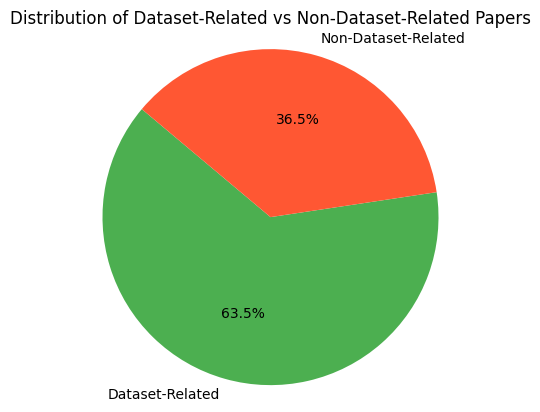

In [10]:
import json
import matplotlib.pyplot as plt

# Load the JSONL file
file_path = 'results_final_2.0.jsonl'

dataset_related_count = 0
non_dataset_related_count = 0

with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        paper = json.loads(line.strip())
        # Check the dataset_name field
        for title, details in paper.items():
            dataset_name_field = details.get('dataset_name')
            if dataset_name_field:  # Ensure the field exists
                try:
                    # Clean the dataset_name field and parse JSON
                    cleaned_dataset_name = dataset_name_field.strip('```json').strip('```').strip()
                    dataset_name_json = json.loads(cleaned_dataset_name)
                    
                    # Check if datasets field is null
                    if dataset_name_json.get("datasets") is not None:
                        dataset_related_count += 1
                    else:
                        non_dataset_related_count += 1
                except json.JSONDecodeError as e:
                    print(f"JSON decode error for paper '{title}': {e}")
                    non_dataset_related_count += 1
            else:
                non_dataset_related_count += 1

# Calculate percentages
total_papers = dataset_related_count + non_dataset_related_count
dataset_related_percentage = (dataset_related_count / total_papers) * 100
non_dataset_related_percentage = (non_dataset_related_count / total_papers) * 100

# Display results
print(f"Dataset-Related Papers: {dataset_related_count} ({dataset_related_percentage:.2f}%)")
print(f"Non-Dataset-Related Papers: {non_dataset_related_count} ({non_dataset_related_percentage:.2f}%)")

# Plot pie chart
labels = ['Dataset-Related', 'Non-Dataset-Related']
sizes = [dataset_related_count, non_dataset_related_count]
colors = ['#4CAF50', '#FF5733']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Dataset-Related vs Non-Dataset-Related Papers')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular.
plt.show()


Total papers per consolidated conference:
SP: 428
CCS: 493
NDSS: 87
ACSAC: 162
None: 1
USENIX: 22


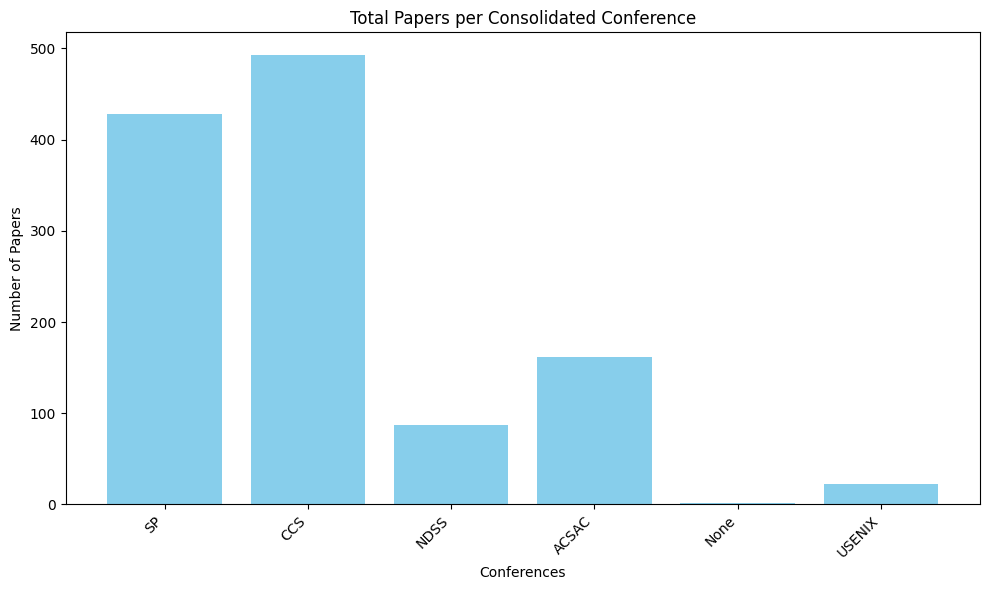

In [12]:
import json
from collections import Counter
import matplotlib.pyplot as plt

# Load the JSONL file
file_path = "results_final_2.0.jsonl"

# Initialize a counter for consolidated conference names
conference_counter = Counter()

# Define a mapping of sub-conferences to parent conferences
conference_mapping = {
    "USS": "USENIX",
    "USENIX ATC": "USENIX",
    "ATC": "USENIX",
    "FAST": "USENIX",
    "NSDI": "USENIX",
    "OSDI": "USENIX",
    "NDSS": "NDSS",
    "MADWeb": "NDSS",
    "ACSAC": "ACSAC",
    "AISCC": "ACSAC",
    "SP": "SP",
    "TPDS": "SP",
    "TASLP": "SP",
    "CCS": "CCS",
    "ASIA CCS": "CCS"
}

# Process the JSONL file
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        paper = json.loads(line.strip())
        for _, details in paper.items():
            conference_name_field = details.get('conference_name')
            if conference_name_field:
                try:
                    conference_name_json = json.loads(conference_name_field.strip('```json'))
                    conference_name = conference_name_json.get("conference")
                    if conference_name and conference_name != "N/A":
                        # Map the conference to its parent category
                        consolidated_conference = conference_mapping.get(conference_name, conference_name)
                        conference_counter[consolidated_conference] += 1
                except json.JSONDecodeError as e:
                    print(f"Error decoding JSON for conference_name: {e}")

# Print the total papers per consolidated conference
print("Total papers per consolidated conference:")
for conference, count in conference_counter.items():
    print(f"{conference}: {count}")

# Visualization
conferences = list(conference_counter.keys())
counts = list(conference_counter.values())

plt.figure(figsize=(10, 6))
plt.bar(conferences, counts, color='skyblue')
plt.xlabel("Conferences")
plt.ylabel("Number of Papers")
plt.title("Total Papers per Consolidated Conference")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Temporal Trends in Dataset Usage (2015-2024)

Error decoding JSON: Expecting ',' delimiter: line 8 column 63 (char 277)
Error decoding JSON: Expecting ',' delimiter: line 22 column 55 (char 703)
Error decoding JSON: Expecting ',' delimiter: line 36 column 47 (char 1023)


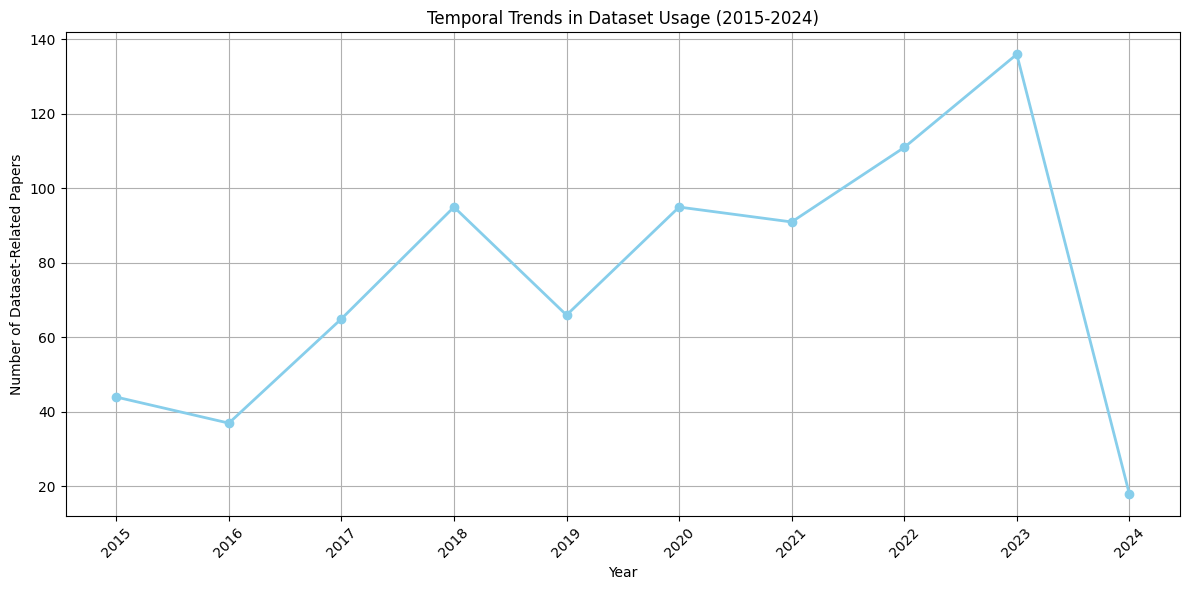

Yearly Dataset Paper Counts:
2015: 44 papers
2016: 37 papers
2017: 65 papers
2018: 95 papers
2019: 66 papers
2020: 95 papers
2021: 91 papers
2022: 111 papers
2023: 136 papers
2024: 18 papers


In [13]:
import json
from collections import Counter
import matplotlib.pyplot as plt

# Load the JSONL file
file_path = "results_final_2.0.jsonl"

# Initialize a counter for year-wise dataset-related papers
yearly_dataset_papers = Counter()

# Process the JSONL file
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        paper = json.loads(line.strip())
        for _, details in paper.items():
            # Extract year and dataset_name fields
            year_field = details.get('published_year')
            dataset_name_field = details.get('dataset_name')

            if year_field and dataset_name_field:
                try:
                    # Parse the year field
                    year_json = json.loads(year_field.strip('```json'))
                    year = year_json.get("year")
                    
                    # Check if a dataset is mentioned
                    cleaned_dataset_name = dataset_name_field.strip('```json').strip('```').strip()
                    dataset_name_json = json.loads(cleaned_dataset_name)
                    if dataset_name_json.get("datasets"):
                        yearly_dataset_papers[year] += 1
                except json.JSONDecodeError as e:
                    print(f"Error decoding JSON: {e}")

# Sort the yearly data by year
sorted_yearly_data = sorted(yearly_dataset_papers.items())

# Split the data into years and counts for plotting
years = [int(year) for year, _ in sorted_yearly_data]
counts = [count for _, count in sorted_yearly_data]

# Plot the temporal trend
plt.figure(figsize=(12, 6))
plt.plot(years, counts, marker='o', linestyle='-', color='skyblue', linewidth=2)
plt.xlabel("Year")
plt.ylabel("Number of Dataset-Related Papers")
plt.title("Temporal Trends in Dataset Usage (2015-2024)")
plt.xticks(range(2015, 2025), rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the yearly dataset paper counts
print("Yearly Dataset Paper Counts:")
for year, count in sorted_yearly_data:
    print(f"{year}: {count} papers")


Dataset_summary_final.csv

In [14]:
import json
import csv

def process_jsonl_to_csv(file_path, output_csv):
    datasets_summary = []

    # Read the JSONL file
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            paper = json.loads(line.strip())
            for title, details in paper.items():
                dataset_name_field = details.get('dataset_name')
                if dataset_name_field:
                    try:
                        # Parse dataset_name JSON
                        cleaned_dataset_name = dataset_name_field.strip('```json').strip('```').strip()
                        try:
                            dataset_name_json = json.loads(cleaned_dataset_name)
                        except json.JSONDecodeError as e:
                            print(f"Error decoding dataset_name for paper '{title}': {e}")
                            continue
                        
                        datasets = dataset_name_json.get("datasets", [])
                        if isinstance(datasets, list):  # Ensure datasets is a list before iterating
                            for dataset in datasets:
                                dataset_summary = {
                                    "title": title,  # Add the title field
                                    "dataset_name": dataset.get("dataset_name", "N/A"),
                                    "contributors": dataset.get("contributors", "N/A"),
                                    "doi": dataset.get("doi", "N/A"),
                                    "url": dataset.get("url", "N/A"),
                                    "availability": "N/A",
                                    "labeling_type": "N/A",
                                    "dataset_type": "N/A",
                                    "category": "N/A",
                                    "subcategory": "N/A"
                                }

                                # Process dataset_analysis_combined field
                                dataset_analysis_combined_field = details.get('dataset_analysis_combined')
                                if dataset_analysis_combined_field:
                                    try:
                                        cleaned_analysis = dataset_analysis_combined_field.strip('```json').strip('```').strip()
                                        analysis_json = json.loads(cleaned_analysis)
                                        for analysis in analysis_json.get("dataset_analysis_combined", []):
                                            if analysis["dataset_name"] == dataset_summary["dataset_name"]:
                                                dataset_summary.update({
                                                    "availability": analysis.get("availability", "N/A"),
                                                    "labeling_type": analysis.get("labeling_type", "N/A"),
                                                    "dataset_type": analysis.get("dataset_type", "N/A")
                                                })
                                    except json.JSONDecodeError as e:
                                        print(f"Error decoding dataset_analysis_combined for paper '{title}': {e}")

                                # Process dataset_categories field
                                dataset_categories_field = details.get('dataset_categories')
                                if dataset_categories_field:
                                    try:
                                        cleaned_categories = dataset_categories_field.strip('```json').strip('```').strip()
                                        try:
                                            categories_json = json.loads(cleaned_categories)
                                        except json.JSONDecodeError as e:
                                            print(f"Error decoding dataset_categories for paper '{title}': {e}")
                                            continue
                                        
                                        # Check if dataset_categories is valid before iteration
                                        if isinstance(categories_json, dict) and categories_json.get("dataset_categories"):
                                            for category in categories_json["dataset_categories"]:
                                                if category["dataset_name"] == dataset_summary["dataset_name"]:
                                                    dataset_summary.update({
                                                        "category": category.get("category", "N/A"),
                                                        "subcategory": category.get("subcategory", "N/A")
                                                    })
                                    except json.JSONDecodeError as e:
                                        print(f"Error decoding dataset_categories for paper '{title}': {e}")

                                # Append the dataset summary
                                datasets_summary.append(dataset_summary)

                    except json.JSONDecodeError as e:
                        print(f"Error decoding dataset_name for paper '{title}': {e}")

    # Write to CSV
    fieldnames = [
        "title", "dataset_name", "contributors", "doi", "url",
        "availability", "labeling_type", "dataset_type",
        "category", "subcategory"
    ]
    with open(output_csv, 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(datasets_summary)

    print(f"Processed data saved to {output_csv}")

# Run the function
process_jsonl_to_csv('results_final_2.0.jsonl', 'datasets_summary.csv')


Error decoding dataset_name for paper 'Revisiting Fuzzy Signatures: Towards a More Risk-Free': Expecting ',' delimiter: line 8 column 63 (char 277)
Error decoding dataset_name for paper 'Leveraging Prefix Structure to Detect Volumetric DDoS Attack Signatures with': Expecting ',' delimiter: line 22 column 55 (char 703)
Error decoding dataset_name for paper 'On The Empirical Effectiveness of Unrealistic': Expecting ',' delimiter: line 36 column 47 (char 1023)
Processed data saved to datasets_summary.csv


Error decoding dataset_name: Expecting ',' delimiter: line 8 column 63 (char 277)
Error decoding dataset_name: Expecting ',' delimiter: line 22 column 55 (char 703)
Error decoding dataset_name: Expecting ',' delimiter: line 36 column 47 (char 1023)
Top public datasets saved to top_public_datasets.csv

Top Public Datasets by Frequency:
cifar10 and cifar100: 86
mnist: 64
imagenet: 19
gtsrb: 18
enron email dataset: 15
pubmed: 14
citeseer: 13
celeba: 12
cora: 12
virustotal: 9
cicids2017: 8
adult: 8
svhn: 8
unswnb15: 7
facebook: 7
stl10: 7
tinyimagenet: 7
hdfs: 6
movielens: 6
utkface: 6
twitter: 5
androzoo: 5
texas100: 5
kosarak: 4
gowalla dataset: 4
drebin: 4
imdb: 4
ember: 4
ppi: 4
csdn: 4


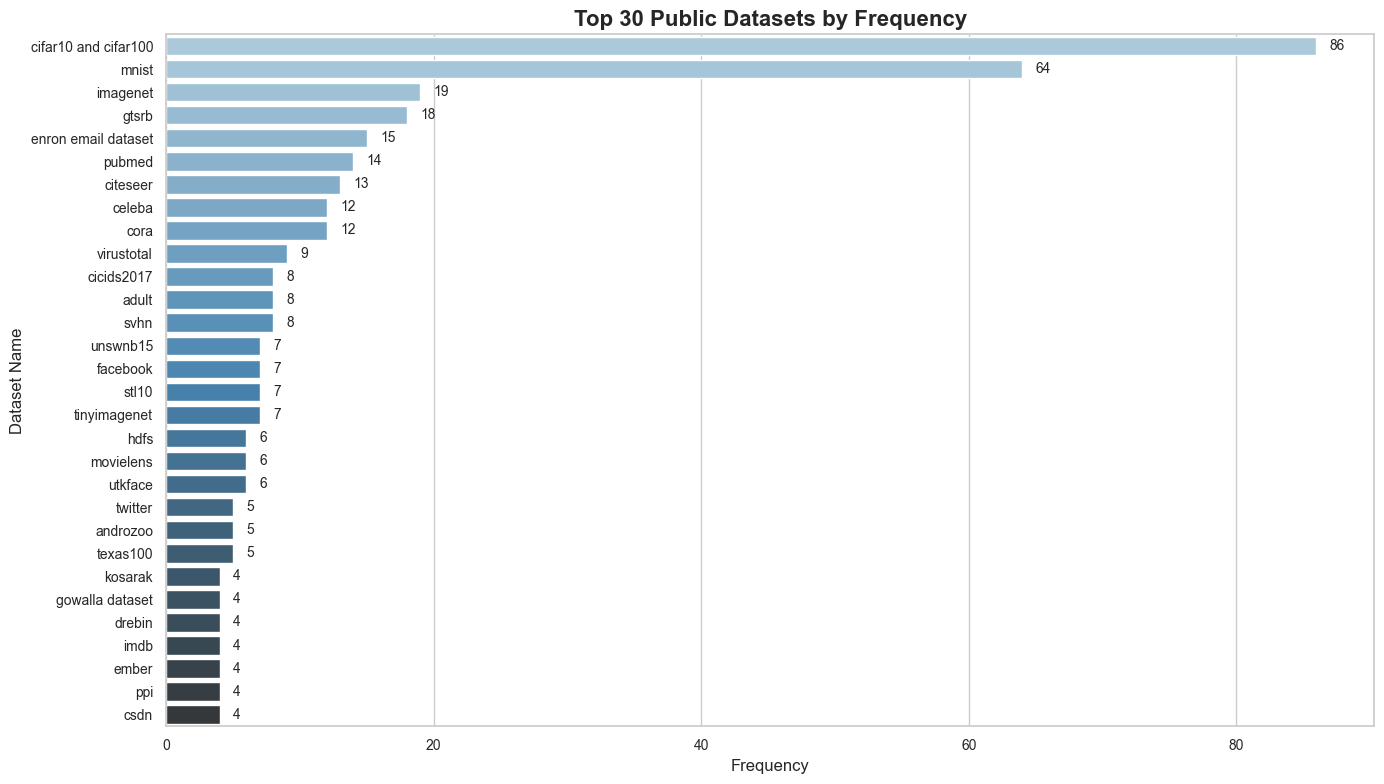

In [52]:
import json
import csv
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

def normalize_dataset_name(name):
    name = name.strip().lower().replace("-", "").replace("_", "")
    
    # Group similar datasets
    if "cifar10" in name or "cifar100" in name:
        return "cifar10 and cifar100"
    if name in {"droidbench", "fashionmnist", "spec2006", "none", "openssl"}:  # Exclude specific datasets
        return None
    if "enron" in name:
        return "enron email dataset"  # Merge all Enron variations
    if "virustotal reports" in name:
        return "virustotal"
    return name


# Function to extract public datasets
def extract_public_datasets(file_path, output_csv):
    public_datasets = Counter()

    # Read the JSONL file
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            try:
                paper = json.loads(line.strip())
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON line: {e}")
                continue

            for _, details in paper.items():
                dataset_name_field = details.get('dataset_name')

                if dataset_name_field:
                    try:
                        cleaned_dataset_name = dataset_name_field.strip('```json').strip('```').strip()
                        dataset_name_json = json.loads(cleaned_dataset_name)

                        datasets = dataset_name_json.get("datasets", [])
                        if isinstance(datasets, list):
                            for dataset in datasets:
                                dataset_name = dataset.get("dataset_name", "N/A")
                                normalized_name = normalize_dataset_name(dataset_name)
                                if normalized_name is None:
                                    continue  # Skip excluded datasets

                                dataset_analysis_combined_field = details.get('dataset_analysis_combined')
                                if dataset_analysis_combined_field:
                                    try:
                                        cleaned_analysis = dataset_analysis_combined_field.strip('```json').strip('```').strip()
                                        analysis_json = json.loads(cleaned_analysis)

                                        for analysis in analysis_json.get("dataset_analysis_combined", []):
                                            if (
                                                analysis.get("dataset_name") == dataset_name
                                                and analysis.get("availability") == "public"
                                            ):
                                                public_datasets[normalized_name] += 1
                                    except json.JSONDecodeError as e:
                                        print(f"Error decoding dataset_analysis_combined: {e}")
                    except json.JSONDecodeError as e:
                        print(f"Error decoding dataset_name: {e}")

    # Write to CSV
    with open(output_csv, 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["dataset_name", "frequency"])
        for dataset_name, frequency in public_datasets.most_common(15):
            writer.writerow([dataset_name, frequency])

    print(f"Top public datasets saved to {output_csv}\n")
    
    # Print the top public datasets and their frequencies
    print("Top Public Datasets by Frequency:")
    for dataset_name, frequency in public_datasets.most_common(30):
        print(f"{dataset_name}: {frequency}")

    return public_datasets

# Function to plot the datasets with better visualization
def plot_top_datasets(dataset_counts, output_png):
    # Get the top 25 datasets
    sorted_datasets = dataset_counts.most_common(30)
    dataset_names = [item[0] for item in sorted_datasets]
    frequencies = [item[1] for item in sorted_datasets]

    # Set Seaborn style for better visuals
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(14, 8))

    # Create horizontal bar plot
    bars = sns.barplot(
        x=frequencies,
        y=dataset_names,
        palette="Blues_d",
        orient="h",
    )

    # Annotate frequencies on the bars
    for index, bar in enumerate(bars.patches):
        plt.text(
            bar.get_width() + 1,  # Position to the right of the bar
            bar.get_y() + bar.get_height() / 2,  # Centered vertically
            f"{frequencies[index]}",
            fontsize=10,
            va="center",
            ha="left",
        )

    # Add titles and labels
    plt.xlabel("Frequency", fontsize=12)
    plt.ylabel("Dataset Name", fontsize=12)
    plt.title("Top 30 Public Datasets by Frequency", fontsize=16, fontweight="bold")
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.savefig(output_png, dpi=300)
    plt.show()

# Main script
input_jsonl = "results_final_2.0.jsonl"
output_csv = "top_public_datasets.csv"
output_png = "top_public_datasets.png"

# Extract and plot datasets
public_datasets = extract_public_datasets(input_jsonl, output_csv)
plot_top_datasets(public_datasets, output_png)


C:\Users\Roohana Karim\AppData\Local\Temp\ipykernel_57448\287589420.py:67: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1200x800 with 0 Axes>

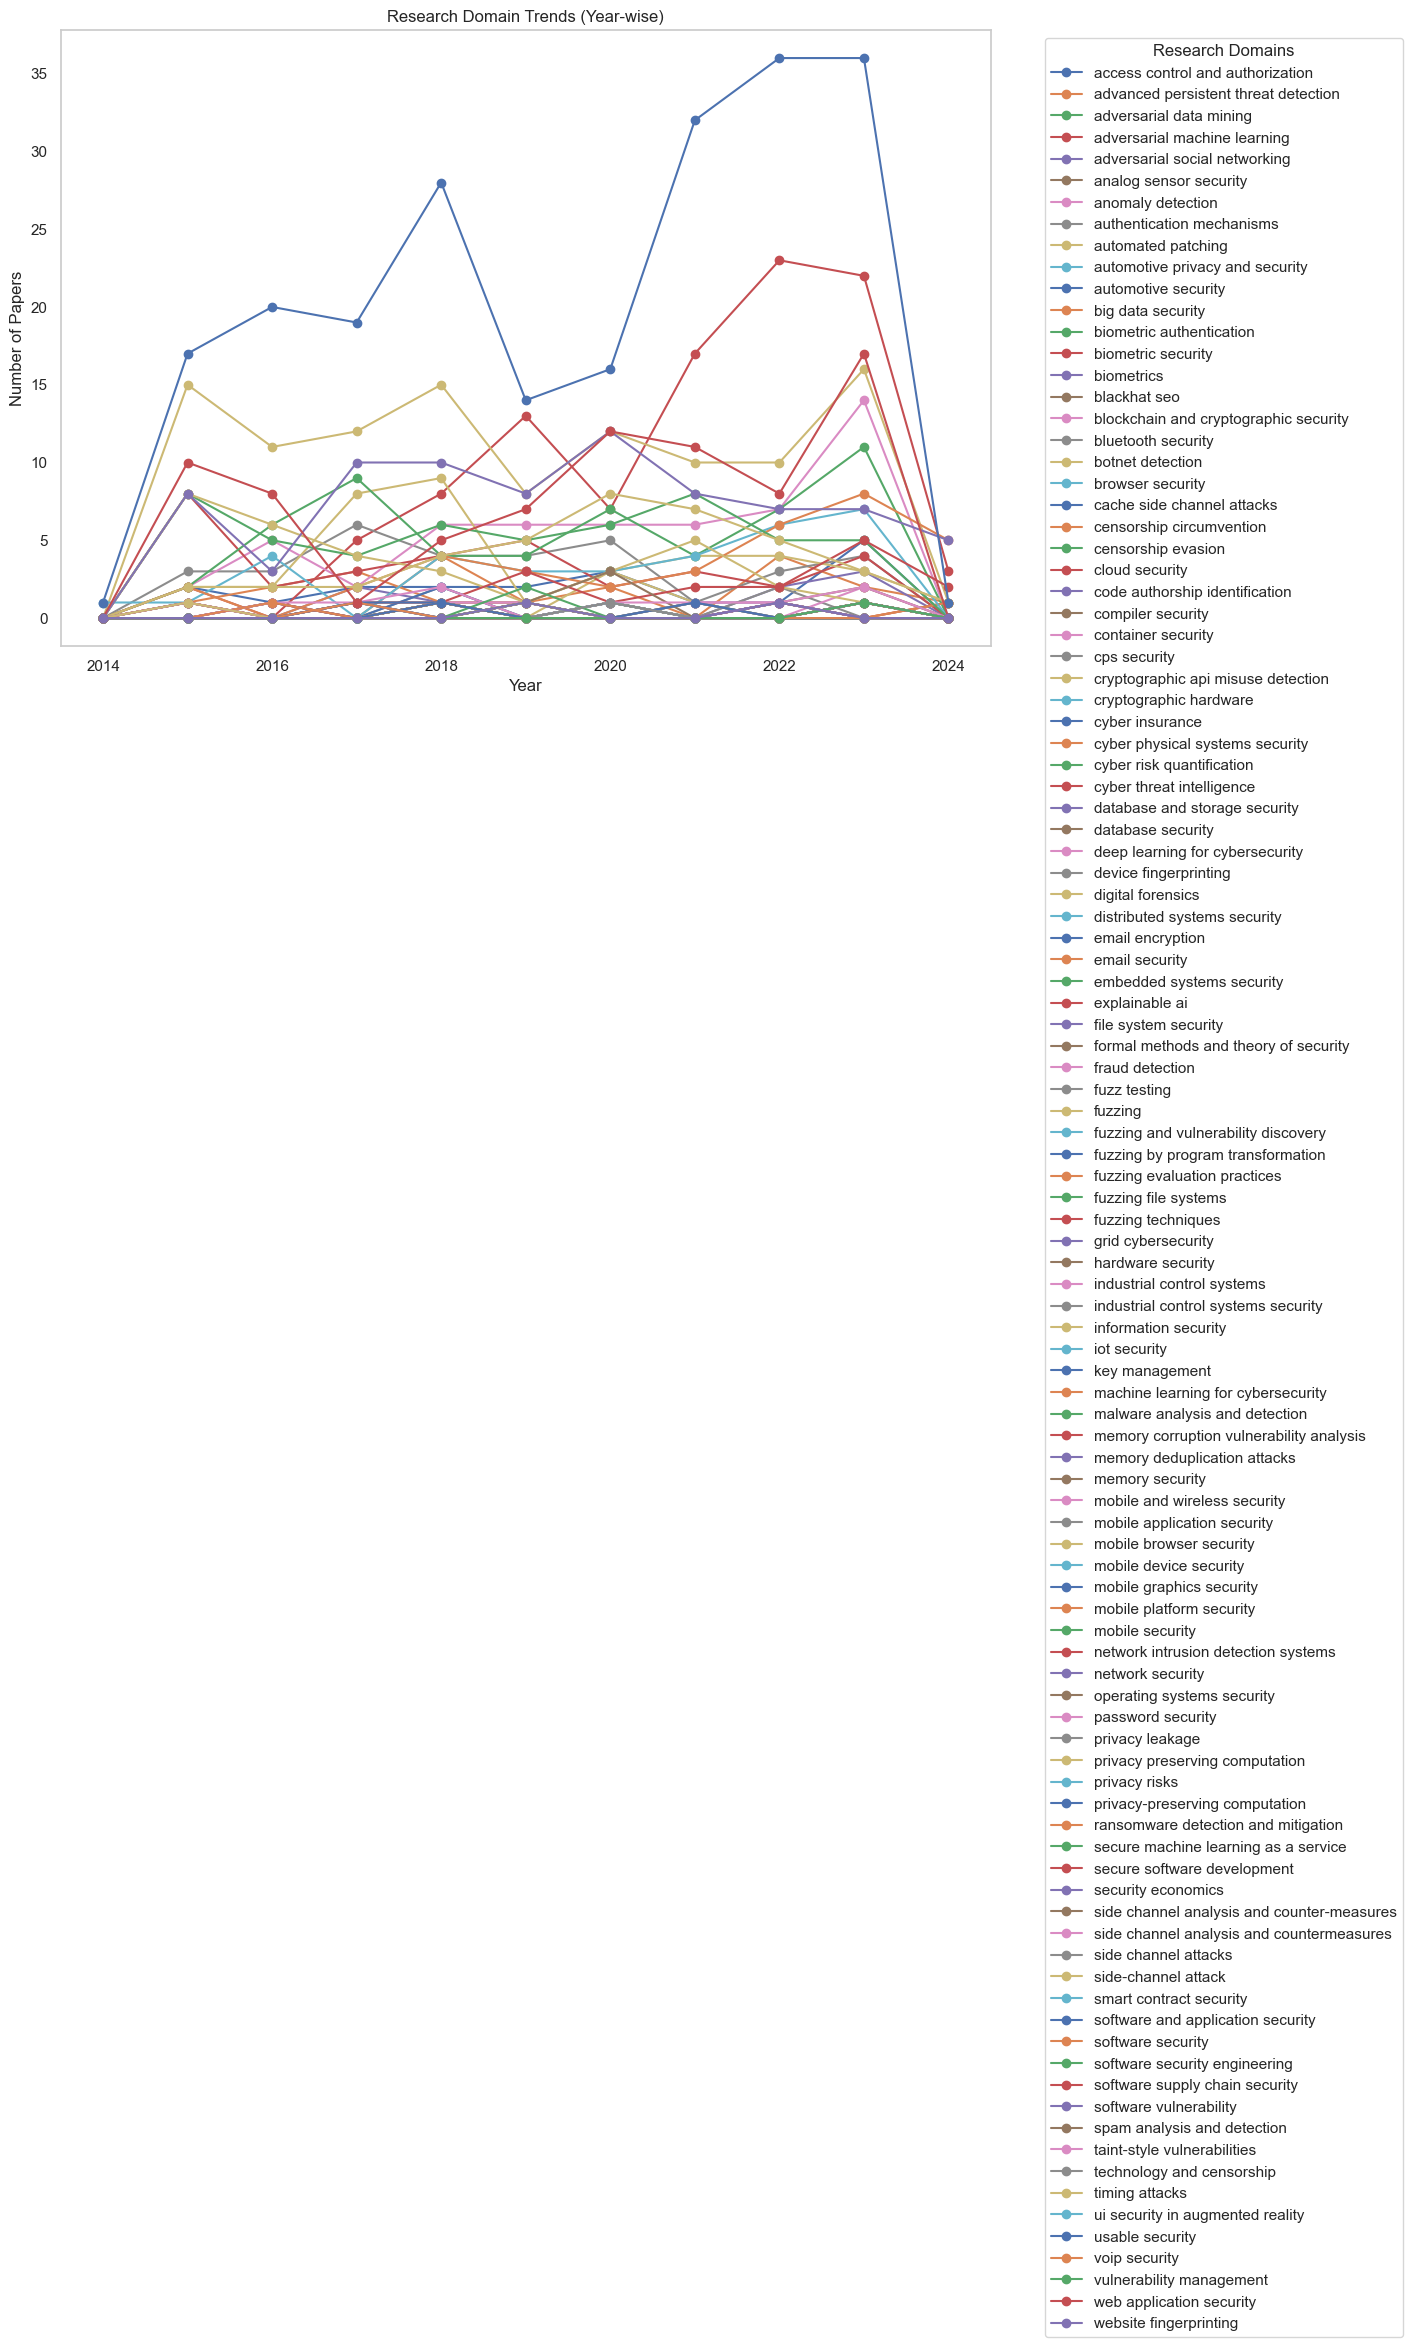

Research trends saved to 'research_domain_trends.csv' and plotted.


In [20]:
import json
import csv
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd

def extract_research_domains(file_path):
    # Dictionary to store domain counts per year
    domains_years = defaultdict(lambda: defaultdict(int))

    # Read the JSONL file
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            paper = json.loads(line.strip())
            for _, details in paper.items():
                # Extract year
                published_year_field = details.get('published_year')
                if published_year_field:
                    try:
                        cleaned_year = published_year_field.strip('```json').strip('```').strip()
                        year_json = json.loads(cleaned_year)
                        year = year_json.get("year")
                    except json.JSONDecodeError:
                        continue
                else:
                    year = "Unknown"

                # Extract research domain
                domain_field = details.get('domain')
                if domain_field:
                    try:
                        cleaned_domain = domain_field.strip('```json').strip('```').strip()
                        domain_json = json.loads(cleaned_domain)
                        domain = domain_json.get("research_domain", "Unknown")
                    except json.JSONDecodeError:
                        domain = "Unknown"
                else:
                    domain = "Unknown"

                # Increment the domain count for the year
                if year != "Unknown" and domain != "Unknown":
                    domains_years[year][domain] += 1

    return domains_years

def create_trends_dataframe(domains_years):
    # Convert the nested dictionary to a flat DataFrame
    trends_data = []
    for year, domains in domains_years.items():
        for domain, count in domains.items():
            trends_data.append({"year": int(year), "domain": domain, "count": count})

    return pd.DataFrame(trends_data)

def plot_research_trends(df):
    # Pivot the DataFrame to get years as columns and domains as rows
    pivot_df = df.pivot(index='year', columns='domain', values='count').fillna(0)

    # Plot the trends for top research domains
    plt.figure(figsize=(12, 8))
    pivot_df.plot(kind='line', figsize=(12, 8), marker='o')
    plt.title('Research Domain Trends (Year-wise)')
    plt.xlabel('Year')
    plt.ylabel('Number of Papers')
    plt.legend(title="Research Domains", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid()
    plt.tight_layout()
    plt.show()

# Main script
file_path = 'results_final_2.0.jsonl'
domains_years = extract_research_domains(file_path)
trends_df = create_trends_dataframe(domains_years)

# Save the trends to a CSV
trends_df.to_csv('research_domain_trends.csv', index=False)

# Plot the trends
plot_research_trends(trends_df)
print("Research trends saved to 'research_domain_trends.csv' and plotted.")


Top 10 Research Domain Trends

In [16]:
import json
from collections import defaultdict
import pandas as pd

def normalize_domain_name(domain):
    """Normalize domain names by removing special characters and extra spaces."""
    return domain.lower().replace('-', ' ').strip()

def extract_research_domains(file_path):
    # Dictionary to store domain counts per year
    domains_years = defaultdict(lambda: defaultdict(int))

    # Read the JSONL file
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            paper = json.loads(line.strip())
            for _, details in paper.items():
                # Extract year
                published_year_field = details.get('published_year')
                if published_year_field:
                    try:
                        cleaned_year = published_year_field.strip('```json').strip('```').strip()
                        year_json = json.loads(cleaned_year)
                        year = year_json.get("year")
                    except json.JSONDecodeError:
                        continue
                else:
                    year = "Unknown"

                # Exclude papers before 2015
                if year == "Unknown" or int(year) < 2015:
                    continue

                # Extract research domain
                domain_field = details.get('domain')
                if domain_field:
                    try:
                        cleaned_domain = domain_field.strip('```json').strip('```').strip()
                        domain_json = json.loads(cleaned_domain)
                        domain = domain_json.get("research_domain", "Unknown")
                        domain = normalize_domain_name(domain)  # Normalize domain name
                    except json.JSONDecodeError:
                        domain = "Unknown"
                else:
                    domain = "Unknown"

                # Increment the domain count for the year
                if year != "Unknown" and domain != "Unknown":
                    domains_years[year][domain] += 1

    return domains_years

def create_trends_dataframe(domains_years):
    # Convert the nested dictionary to a flat DataFrame
    trends_data = []
    for year, domains in domains_years.items():
        for domain, count in domains.items():
            trends_data.append({"year": int(year), "domain": domain, "count": count})

    return pd.DataFrame(trends_data)

def get_top_domains(df, top_n=10):
    # Aggregate counts across all years for each domain
    domain_totals = df.groupby('domain')['count'].sum()

    # Get the top N domains
    top_domains = domain_totals.nlargest(top_n).index

    return top_domains

def filter_top_domains(df, top_domains):
    # Filter the DataFrame to only include the top domains                             
    
    return df[df['domain'].isin(top_domains)]

def add_percentage(df):
    # Calculate total papers per year
    yearly_totals = df.groupby('year')['count'].sum().reset_index(name='yearly_total')

    # Merge yearly totals with the original DataFrame
    df = pd.merge(df, yearly_totals, on='year')

    # Calculate percentages
    df['percentage'] = (df['count'] / df['yearly_total']) * 100

    return df

# Main script
file_path = 'results_final_2.0.jsonl'
domains_years = extract_research_domains(file_path)
trends_df = create_trends_dataframe(domains_years)

# Get the top 10 research domains
top_domains = get_top_domains(trends_df, top_n=10)

# Filter the trends DataFrame to only include top domains
top_trends_df = filter_top_domains(trends_df, top_domains)

# Add percentages to the top trends DataFrame
top_trends_df = add_percentage(top_trends_df)

# Save results in JSON and CSV formats
json_output_path = "research_domain_trends.json"
csv_output_path = "research_domain_trends.csv"
top_trends_df.to_json(json_output_path, orient='records', indent=4)
top_trends_df.to_csv(csv_output_path, index=False)

# Print the results
print(f"Results saved: JSON ({json_output_path}), CSV ({csv_output_path})")
print("\nTop Research Domain Trends (Counts and Percentages):")
for year, group in top_trends_df.groupby('year'):
    print(f"\nYear: {year}")
    for _, row in group.iterrows():
        print(f"Domain: {row['domain']}, Count: {row['count']}, Percentage: {row['percentage']:.2f}%")


Results saved: JSON (research_domain_trends.json), CSV (research_domain_trends.csv)

Top Research Domain Trends (Counts and Percentages):

Year: 2015
Domain: privacy preserving computation, Count: 19, Percentage: 27.14%
Domain: malware analysis and detection, Count: 8, Percentage: 11.43%
Domain: information security, Count: 15, Percentage: 21.43%
Domain: network security, Count: 8, Percentage: 11.43%
Domain: web application security, Count: 10, Percentage: 14.29%
Domain: machine learning for cybersecurity, Count: 2, Percentage: 2.86%
Domain: cryptographic api misuse detection, Count: 2, Percentage: 2.86%
Domain: embedded systems security, Count: 2, Percentage: 2.86%
Domain: blockchain and cryptographic security, Count: 2, Percentage: 2.86%
Domain: adversarial machine learning, Count: 2, Percentage: 2.86%

Year: 2016
Domain: privacy preserving computation, Count: 22, Percentage: 35.48%
Domain: information security, Count: 11, Percentage: 17.74%
Domain: embedded systems security, Count: 

Top 10 Research Domains and Dataset Categories

Generated DataFrame:
                         Research Domain  \
0          adversarial machine learning   
1          adversarial machine learning   
2          adversarial machine learning   
3          adversarial machine learning   
4          adversarial machine learning   
5        privacy-preserving computation   
6        privacy-preserving computation   
7        privacy-preserving computation   
8        privacy-preserving computation   
9        privacy-preserving computation   
10       privacy-preserving computation   
11       privacy-preserving computation   
12       privacy-preserving computation   
13       privacy-preserving computation   
14             web application security   
15             web application security   
16             web application security   
17             web application security   
18             web application security   
19                     network security   
20                     network security   
21                     network s

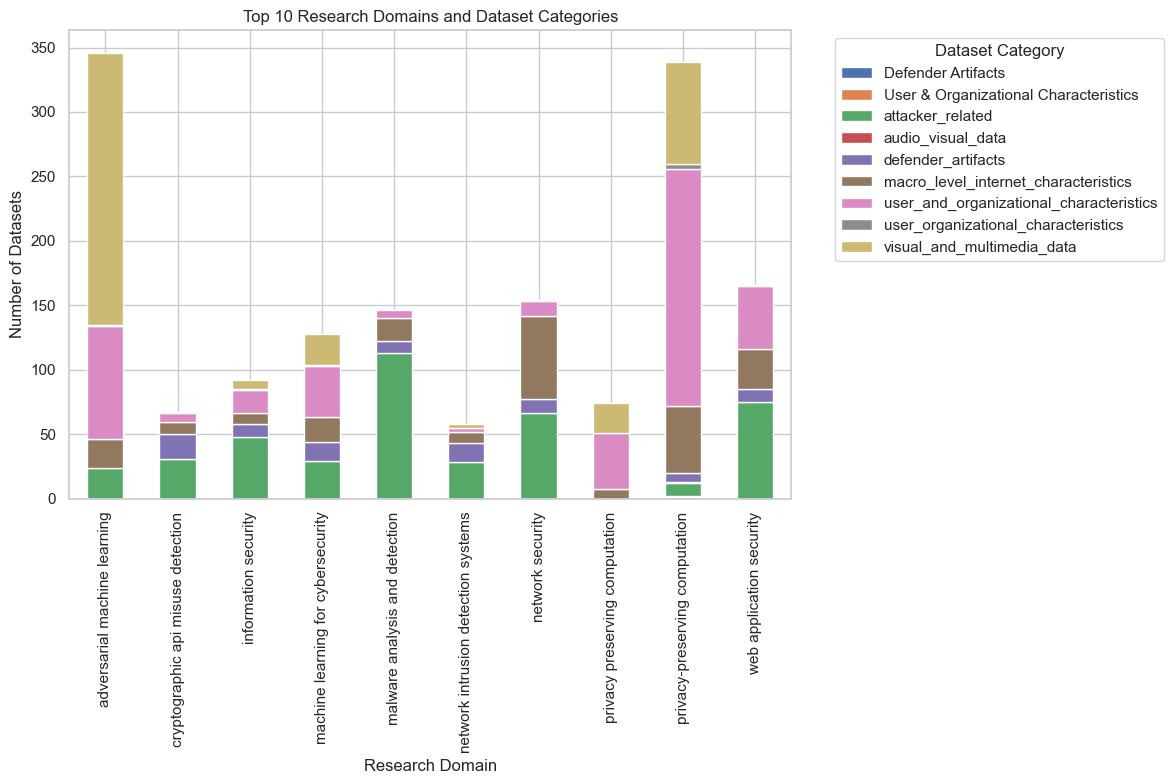

In [25]:
import json
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt


def load_data(file_path):
    """Load data from a JSONL file and return a list of research papers."""
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            data.append(json.loads(line.strip()))
    return data


def extract_domain_dataset_relations(data):
    """Extract the relationship between research domains and dataset categories."""
    domain_dataset_counts = defaultdict(lambda: defaultdict(int))

    for paper in data:
        for _, details in paper.items():
            # Extract research domain
            domain_field = details.get("domain")
            if domain_field:
                try:
                    domain = json.loads(domain_field.strip("```json").strip("```").strip()).get("research_domain", "Unknown")
                except json.JSONDecodeError:
                    domain = "Unknown"
            else:
                domain = "Unknown"

            # Extract dataset categories
            dataset_categories_field = details.get("dataset_categories")
            if dataset_categories_field:
                try:
                    dataset_categories = json.loads(dataset_categories_field.strip("```json").strip("```").strip())
                    if dataset_categories and isinstance(dataset_categories.get("dataset_categories"), list):  # Ensure it's a list
                        for entry in dataset_categories.get("dataset_categories", []):
                            category = entry.get("category", "Unknown")
                            # Combine all "macro_*" into one
                            if category.startswith("macro_"):
                                category = "macro_level_internet_characteristics"
                            # Ignore "null" and "nan"
                            if domain != "Unknown" and category not in ["null", "nan"]:
                                domain_dataset_counts[domain][category] += 1
                except (json.JSONDecodeError, AttributeError, TypeError):
                    continue

    return domain_dataset_counts


def filter_top_domains(domain_dataset_counts, top_n=10):
    """Filter the dataset to include only the top N research domains."""
    domain_totals = {domain: sum(categories.values()) for domain, categories in domain_dataset_counts.items()}
    top_domains = sorted(domain_totals, key=domain_totals.get, reverse=True)[:top_n]

    filtered_counts = {domain: domain_dataset_counts[domain] for domain in top_domains}
    return filtered_counts


def generate_dataframe(domain_dataset_counts):
    """Convert the nested dictionary to a pandas DataFrame."""
    rows = []
    for domain, categories in domain_dataset_counts.items():
        for category, count in categories.items():
            rows.append({"Research Domain": domain, "Dataset Category": category, "Count": count})

    df = pd.DataFrame(rows)
    print("Generated DataFrame:\n", df)  # Debug: Print the DataFrame
    return df


def plot_relationship(df):
    """Plot the relationship between research domains and dataset categories."""
    if "Research Domain" not in df.columns or "Dataset Category" not in df.columns:
        print("Error: Expected columns 'Research Domain' and 'Dataset Category' not found.")
        print("Current DataFrame columns:", df.columns)  # Debug: Print column names
        return

    pivot_df = df.pivot(index="Research Domain", columns="Dataset Category", values="Count").fillna(0)
    print("Pivoted DataFrame:\n", pivot_df)  # Debug: Print pivoted DataFrame

    # Plot the heatmap
    pivot_df.plot(kind="bar", stacked=True, figsize=(12, 8))
    plt.title("Top 10 Research Domains and Dataset Categories")
    plt.xlabel("Research Domain")
    plt.ylabel("Number of Datasets")
    plt.legend(title="Dataset Category", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()


# Main script
file_path = "results_final_2.0.jsonl"
data = load_data(file_path)

# Extract domain-dataset relationships
domain_dataset_counts = extract_domain_dataset_relations(data)

# Filter for top 10 domains
filtered_counts = filter_top_domains(domain_dataset_counts, top_n=10)

# Generate DataFrame and plot
df = generate_dataframe(filtered_counts)

# Save the results to a CSV
output_csv = "top_10_domain_dataset_relationship.csv"
df.to_csv(output_csv, index=False)
print(f"Results saved to {output_csv}")

# Plot the relationship
plot_relationship(df)


Dataset Usage Trends Across All Research Domains (2015-2024)

Generated DataFrame:
                         Research Domain  Year  \
0          adversarial machine learning  2019   
1          adversarial machine learning  2019   
2          adversarial machine learning  2019   
3          adversarial machine learning  2021   
4          adversarial machine learning  2021   
..                                  ...   ...   
259  cryptographic api misuse detection  2017   
260  cryptographic api misuse detection  2017   
261  cryptographic api misuse detection  2017   
262  cryptographic api misuse detection  2020   
263  cryptographic api misuse detection  2016   

                         Dataset Category  Count  
0              visual_and_multimedia_data     34  
1     user organizational characteristics     11  
2                        attacker_related      3  
3              visual_and_multimedia_data     32  
4     user organizational characteristics     14  
..                                    ...    ...  
259                      attacke

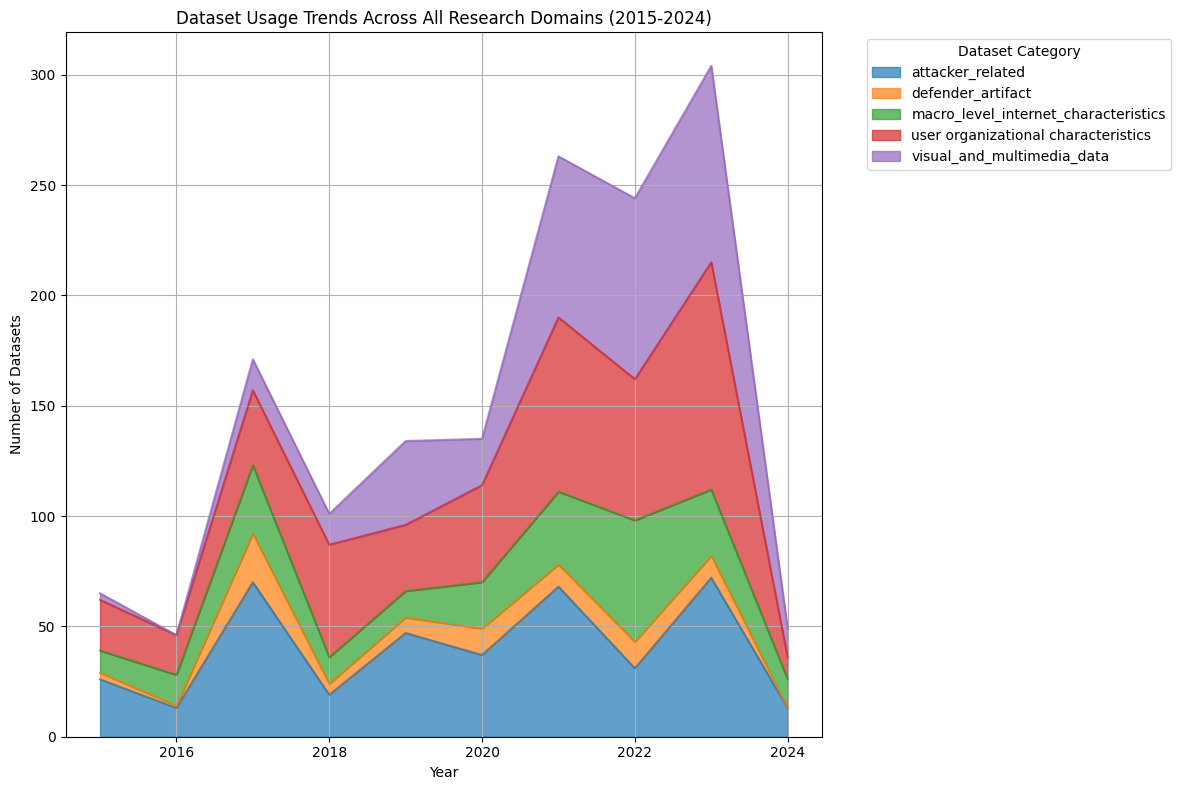

In [24]:
import json
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt


def load_data(file_path):
    """Load data from a JSONL file and return a list of research papers."""
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            data.append(json.loads(line.strip()))
    return data


def extract_domain_year_dataset_relations(data):
    """Extract the relationship between research domains, years, and dataset categories."""
    domain_year_dataset_counts = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))

    for paper in data:
        for _, details in paper.items():
            # Extract research domain
            domain_field = details.get("domain")
            if domain_field:
                try:
                    domain = json.loads(domain_field.strip("```json").strip("```").strip()).get("research_domain", "Unknown")
                except json.JSONDecodeError:
                    domain = "Unknown"
            else:
                domain = "Unknown"

            # Extract year
            year_field = details.get("published_year")
            if year_field:
                try:
                    year = json.loads(year_field.strip("```json").strip("```").strip()).get("year", "Unknown")
                    if year != "Unknown":
                        year = int(year)
                except json.JSONDecodeError:
                    year = "Unknown"
            else:
                year = "Unknown"

            # Extract dataset categories
            dataset_categories_field = details.get("dataset_categories")
            if dataset_categories_field:
                try:
                    dataset_categories = json.loads(dataset_categories_field.strip("```json").strip("```").strip())
                    if dataset_categories and isinstance(dataset_categories.get("dataset_categories"), list):  # Ensure it's a list
                        for entry in dataset_categories.get("dataset_categories", []):
                            category = entry.get("category", "Unknown")
                            # Combine all "macro_*" into one
                            if category.startswith("macro_"):
                                category = "macro_level_internet_characteristics"
                            if category.startswith("user_"):
                                category = "user organizational characteristics"
                            if category.startswith("User "):
                                category = "user organizational characteristics"
                            if category.startswith("Defender"):
                                category = "defender_artifact"
                            if category.startswith("defender_"):
                                category = "defender_artifact"
                            if category.startswith("audio"):
                                category = "visual_and_multimedia_data"
                            # Ignore "null" and "nan"
                            if domain != "Unknown" and category not in ["null", "nan"] and year != "Unknown":
                                domain_year_dataset_counts[domain][year][category] += 1
                            if domain.startswith("privacy-"):
                                domain = "p"
                except (json.JSONDecodeError, AttributeError, TypeError):
                    continue

    return domain_year_dataset_counts


def filter_top_domains(domain_year_dataset_counts, top_n=10):
    """Filter the dataset to include only the top N research domains."""
    domain_totals = {domain: sum(sum(categories.values()) for categories in years.values()) for domain, years in domain_year_dataset_counts.items()}
    top_domains = sorted(domain_totals, key=domain_totals.get, reverse=True)[:top_n]

    filtered_counts = {domain: domain_year_dataset_counts[domain] for domain in top_domains}
    return filtered_counts


def generate_dataframe(domain_year_dataset_counts):
    """Convert the nested dictionary to a pandas DataFrame."""
    rows = []
    for domain, years in domain_year_dataset_counts.items():
        for year, categories in years.items():
            for category, count in categories.items():
                rows.append({"Research Domain": domain, "Year": year, "Dataset Category": category, "Count": count})

    df = pd.DataFrame(rows)
    print("Generated DataFrame:\n", df)  # Debug: Print the DataFrame
    return df


def plot_combined_relationship(df):
    """Plot the combined relationship between research domains, dataset categories, and years."""
    # Group by Year and Dataset Category to aggregate all counts across domains
    combined_df = df.groupby(["Year", "Dataset Category"])["Count"].sum().reset_index()

    # Pivot the data for plotting
    pivot_df = combined_df.pivot(index="Year", columns="Dataset Category", values="Count").fillna(0)

    # Plot a stacked area chart
    pivot_df.plot(kind="area", figsize=(12, 8), stacked=True, alpha=0.7)
    plt.title("Dataset Usage Trends Across All Research Domains (2015-2024)")
    plt.xlabel("Year")
    plt.ylabel("Number of Datasets")
    plt.legend(title="Dataset Category", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.grid()
    plt.show()


# Main script
file_path = "results_final_2.0.jsonl"
data = load_data(file_path)

# Extract domain-year-dataset relationships
domain_year_dataset_counts = extract_domain_year_dataset_relations(data)

# Filter for top 10 domains
filtered_counts = filter_top_domains(domain_year_dataset_counts, top_n=10)

# Generate DataFrame and plot
df = generate_dataframe(filtered_counts)

# Save the results to a CSV
output_csv = "top_10_combined_dataset_trends.csv"
df.to_csv(output_csv, index=False)
print(f"Results saved to {output_csv}")

# Plot the combined relationship
plot_combined_relationship(df)


Research Domain and Subcategory

In [27]:
import json
from collections import defaultdict
import pandas as pd


def load_data(file_path):
    """Load data from a JSONL file and return a list of research papers."""
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            data.append(json.loads(line.strip()))
    return data


def normalize_domain(domain):
    """Normalize inconsistent research domain names."""
    domain_mapping = {
        "privacy-preserving computation": "privacy preserving computation",
        "privacy preserving computation": "privacy preserving computation"
    }
    return domain_mapping.get(domain.lower(), domain)


def extract_domain_subcategory_counts(data):
    """Extract and count subcategories for each research domain along with the published year."""
    domain_subcategory_counts = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))

    for paper in data:
        for _, details in paper.items():
            # Extract research domain
            domain_field = details.get("domain")
            if domain_field:
                try:
                    domain = json.loads(domain_field.strip("```json").strip("```").strip()).get("research_domain", "Unknown")
                    domain = normalize_domain(domain)  # Normalize domain name
                except json.JSONDecodeError:
                    domain = "Unknown"
            else:
                domain = "Unknown"

            # Extract published year
            year_field = details.get("published_year")
            if year_field:
                try:
                    year = json.loads(year_field.strip("```json").strip("```").strip()).get("year", "Unknown")
                    if isinstance(year, str) and year.isdigit():
                        year = int(year)
                except json.JSONDecodeError:
                    year = "Unknown"
            else:
                year = "Unknown"

            # Extract subcategories
            dataset_categories_field = details.get("dataset_categories")
            if dataset_categories_field:
                try:
                    dataset_categories = json.loads(dataset_categories_field.strip("```json").strip("```").strip())
                    if dataset_categories and isinstance(dataset_categories.get("dataset_categories"), list):
                        for entry in dataset_categories.get("dataset_categories", []):
                            subcategory = entry.get("subcategory", "Unknown").strip().lower()
                            # Ignore null, nan, and unknown values
                            if domain != "Unknown" and subcategory not in ["null", "nan", "unknown"] and year != "Unknown":
                                domain_subcategory_counts[domain][year][subcategory] += 1
                except (json.JSONDecodeError, AttributeError, TypeError):
                    continue

    return domain_subcategory_counts


def generate_dataframe(domain_subcategory_counts):
    """Convert the nested dictionary to a pandas DataFrame."""
    rows = []
    for domain, years in domain_subcategory_counts.items():
        for year, subcategories in years.items():
            for subcategory, count in subcategories.items():
                rows.append({"Research Domain": domain, "Year": year, "Subcategory": subcategory, "Count": count})

    df = pd.DataFrame(rows)

    # Find the top 10 research domains based on total dataset usage
    top_domains = df.groupby("Research Domain")["Count"].sum().nlargest(10).index

    # Filter dataframe to include only the top 10 research domains
    df_filtered = df[df["Research Domain"].isin(top_domains)]

    print("Generated DataFrame with Top 10 Research Domains:\n", df_filtered)  # Debugging output
    return df_filtered


# Main script
file_path = "results_final_2.0.jsonl"
data = load_data(file_path)

# Extract domain-subcategory relationships
domain_subcategory_counts = extract_domain_subcategory_counts(data)

# Generate DataFrame and filter top 10 research domains
df = generate_dataframe(domain_subcategory_counts)

# Save the results to a CSV
output_csv = "top_10_combined_subcategory_trends.csv"
df.to_csv(output_csv, index=False)
print(f"Results saved to {output_csv}")


Generated DataFrame with Top 10 Research Domains:
                            Research Domain  Year                 Subcategory  \
0                         network security  2020                     attacks   
1                         network security  2020                    exploits   
2                         network security  2020              network_traces   
3                         network security  2020             user_activities   
4                         network security  2020  cybercrime_infrastructures   
..                                     ...   ...                         ...   
563  blockchain and cryptographic security  2017                applications   
564  blockchain and cryptographic security  2017              network_traces   
565  blockchain and cryptographic security  2016             vulnerabilities   
566  blockchain and cryptographic security  2019              network_traces   
567  blockchain and cryptographic security  2019             user_att

✅ Saved cleaned data for top 10 research domains: cleaned_top_10_research_domains.csv
✅ Saved Top 10 Subcategories Per Year: top_10_subcategories_per_year.csv


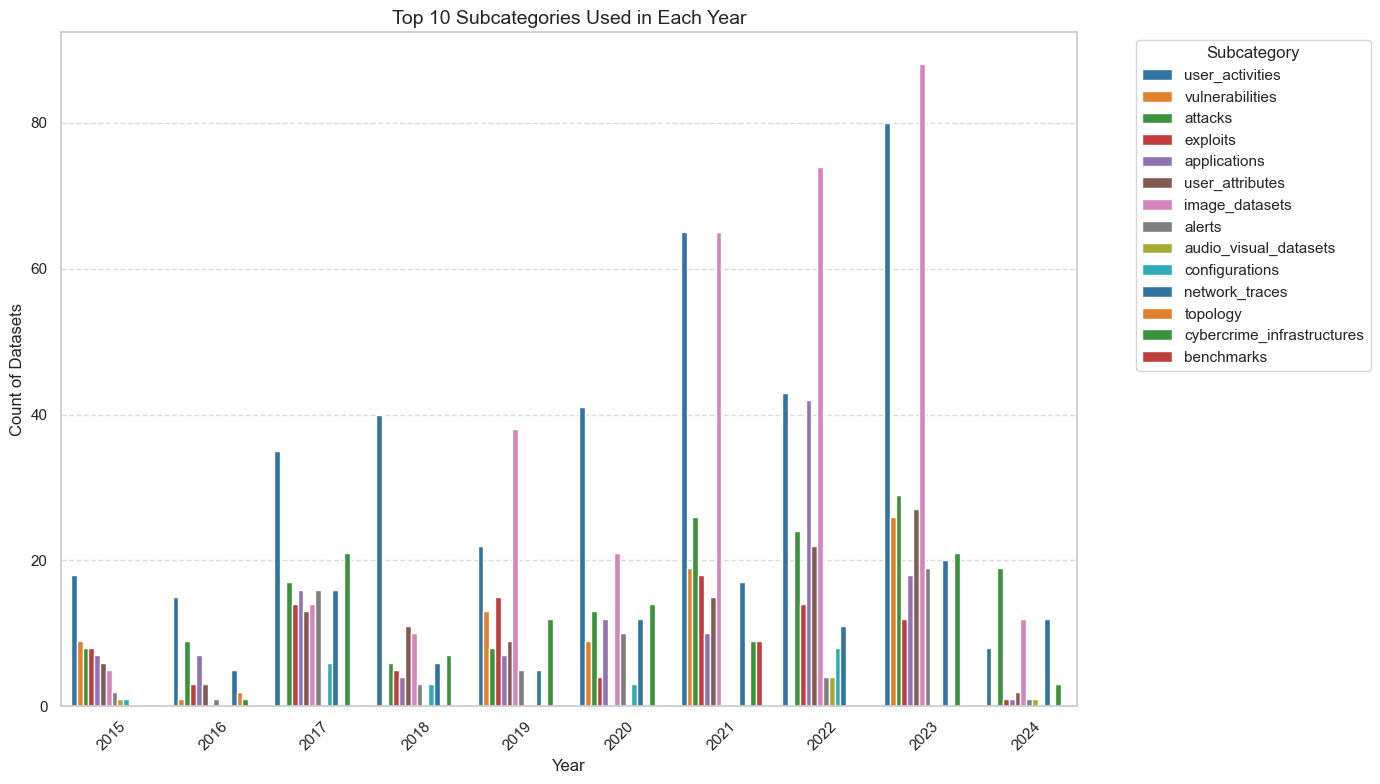

✅ Saved Subcategory Trends Over Time: subcategory_trends_over_time.csv


<Figure size 1400x800 with 0 Axes>

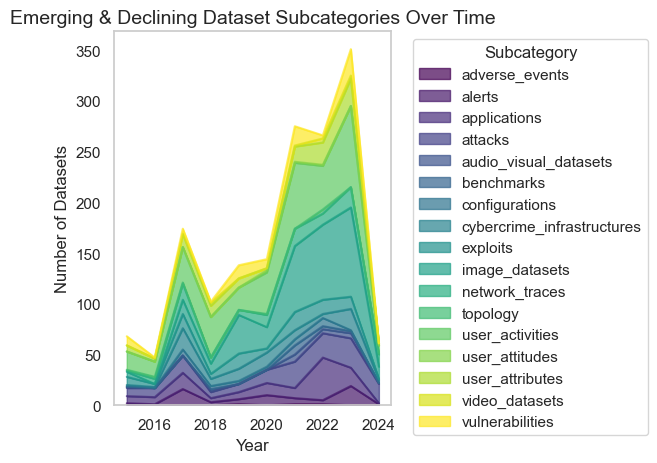

✅ Saved Subcategory-Domain Correlation: subcategory_domain_correlation.csv


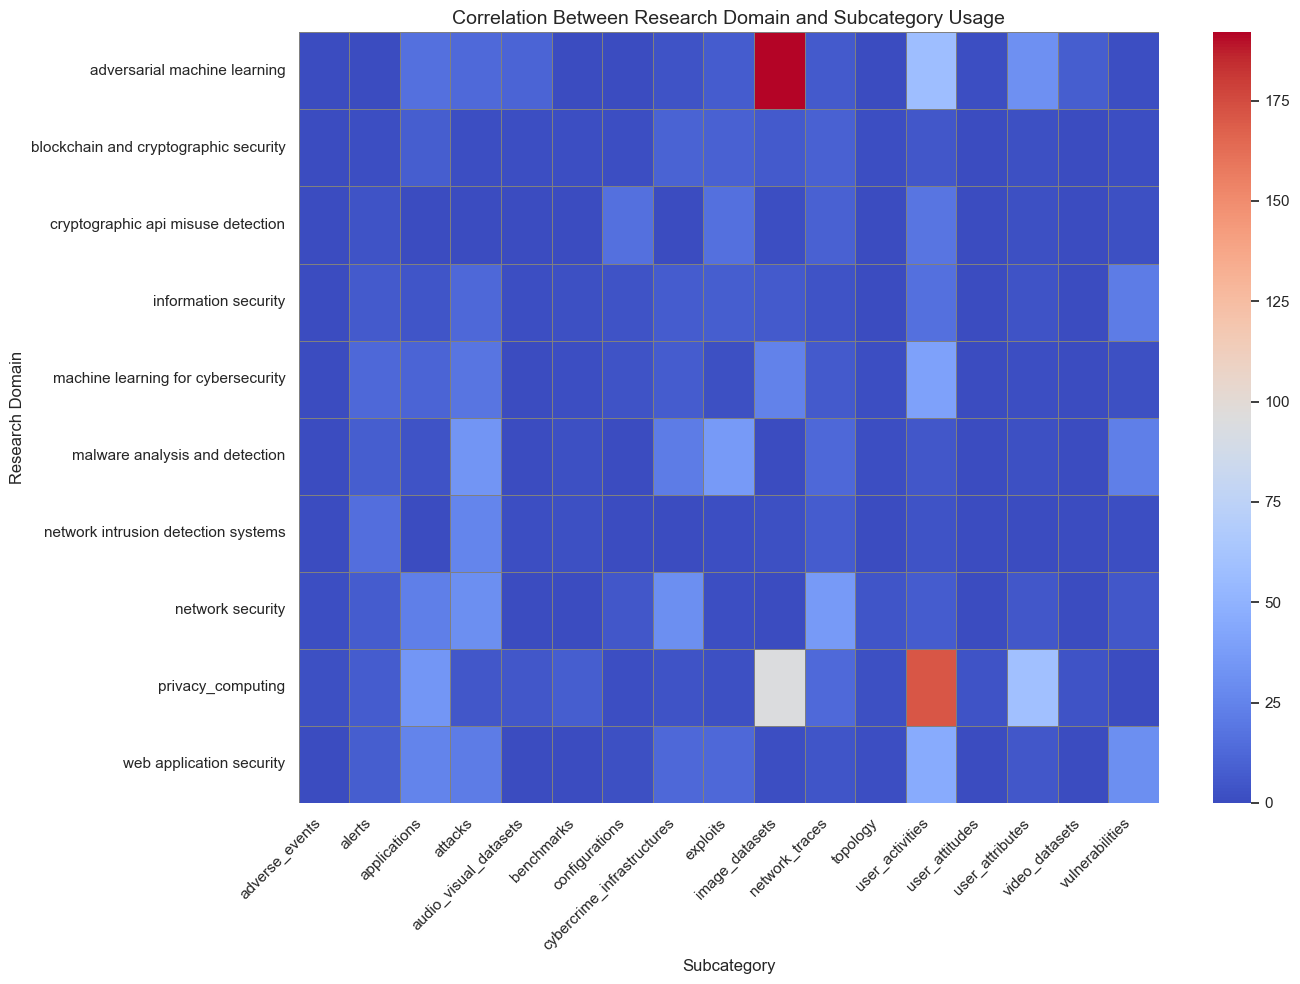

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def normalize_subcategory(subcategory):
    """Standardize subcategory names by merging similar terms."""
    mapping = {
        "malware": "attacks",
        "user activities": "user_activities",
        "user_activities": "user_activities",
        "audio_datasets": "audio_visual_datasets",
        "audio-visual_datasets": "audio_visual_datasets",
        "audio_visual_datasets": "audio_visual_datasets",
        "audit_reports": "audio_visual_datasets",
        "logs": "alerts",
    }
    return mapping.get(subcategory.strip().lower(), subcategory.strip().lower())


def normalize_domain(domain):
    """Standardize research domain names to remove duplicates."""
    mapping = {
        "privacy-preserving computation": "privacy_computing",
        "privacy preserving computation": "privacy_computing",
        "privacy-preserving computing": "privacy_computing",
        "privacy computing": "privacy_computing",
    }
    return mapping.get(domain.strip().lower(), domain.strip().lower())


# Load the CSV file
file_path = "top_10_combined_subcategory_trends.csv"
df = pd.read_csv(file_path)

# Standardize column values
df["Subcategory"] = df["Subcategory"].apply(lambda x: normalize_subcategory(str(x)))
df["Research Domain"] = df["Research Domain"].apply(lambda x: normalize_domain(str(x)))

# Ensure Year is an integer
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
df = df.dropna(subset=["Year"])
df["Year"] = df["Year"].astype(int)

# Determine the top 10 most used research domains
top_domains = df.groupby("Research Domain")["Count"].sum().nlargest(10).index
df = df[df["Research Domain"].isin(top_domains)]

# Save cleaned data for verification
df.to_csv("cleaned_top_10_research_domains.csv", index=False)
print("Saved cleaned data for top 10 research domains: cleaned_top_10_research_domains.csv")


#  **Top 10 Subcategories Used in Each Year**
def analyze_top_10_subcategories_per_year(df):
    top_subcategories_per_year = (
        df.groupby(["Year", "Subcategory"])["Count"]
        .sum()
        .reset_index()
        .sort_values(["Year", "Count"], ascending=[True, False])
    )

    # Get the top 10 subcategories for each year
    top_10_per_year = (
        top_subcategories_per_year.groupby("Year").head(10).reset_index(drop=True)
    )

    # Save to CSV
    top_10_per_year.to_csv("top_10_subcategories_per_year.csv", index=False)
    print(f"Saved Top 10 Subcategories Per Year: top_10_subcategories_per_year.csv")

    # Plot
    plt.figure(figsize=(14, 8))
    sns.barplot(
        data=top_10_per_year,
        x="Year",
        y="Count",
        hue="Subcategory",
        dodge=True,
        palette="tab10",
    )

    plt.title("Top 10 Subcategories Used in Each Year", fontsize=14)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Count of Datasets", fontsize=12)
    plt.legend(title="Subcategory", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig("top_10_subcategories_per_year.png", dpi=300, bbox_inches="tight")
    plt.show()


#  **Emerging & Declining Dataset Subcategories (Filtered by Top 10 Domains)**
def analyze_emerging_declining_subcategories(df):
    subcategory_trends = df.groupby(["Year", "Subcategory"])["Count"].sum().reset_index()

    # Save to CSV
    subcategory_trends.to_csv("subcategory_trends_over_time.csv", index=False)
    print(f"Saved Subcategory Trends Over Time: subcategory_trends_over_time.csv")

    # Pivot for plotting
    pivot_table = subcategory_trends.pivot(index="Year", columns="Subcategory", values="Count").fillna(0)

    # Plot
    plt.figure(figsize=(14, 8))
    pivot_table.plot(kind="area", stacked=True, alpha=0.7, colormap="viridis")

    plt.title("Emerging & Declining Dataset Subcategories Over Time", fontsize=14)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Number of Datasets", fontsize=12)
    plt.legend(title="Subcategory", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.grid()
    plt.tight_layout()
    plt.savefig("emerging_declining_subcategories.png", dpi=300, bbox_inches="tight")
    plt.show()


#  **Correlation Between Research Domain and Subcategory Usage (Filtered by Top 10 Domains)**
def analyze_subcategory_domain_correlation(df):
    domain_subcategory_counts = df.groupby(["Research Domain", "Subcategory"])["Count"].sum().reset_index()

    # Save to CSV
    domain_subcategory_counts.to_csv("subcategory_domain_correlation.csv", index=False)
    print(f" Saved Subcategory-Domain Correlation: subcategory_domain_correlation.csv")

    # Pivot for heatmap
    pivot_table = domain_subcategory_counts.pivot(index="Research Domain", columns="Subcategory", values="Count").fillna(0)

    # Plot
    plt.figure(figsize=(14, 10))
    sns.heatmap(pivot_table, annot=False, cmap="coolwarm", linewidths=0.5, linecolor="gray")

    plt.title("Correlation Between Research Domain and Subcategory Usage", fontsize=14)
    plt.xlabel("Subcategory", fontsize=12)
    plt.ylabel("Research Domain", fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig("subcategory_domain_correlation.png", dpi=300, bbox_inches="tight")
    plt.show()


# Run all trend analyses
analyze_top_10_subcategories_per_year(df)
analyze_emerging_declining_subcategories(df)
analyze_subcategory_domain_correlation(df)


Dataset Subcategories Across Research Domains 2015-2024

C:\Users\Roohana Karim\AppData\Local\Temp\ipykernel_57448\1742472583.py:50: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


 Graph saved as normalized_subcategory_trends_across_domains_2015_2023.png


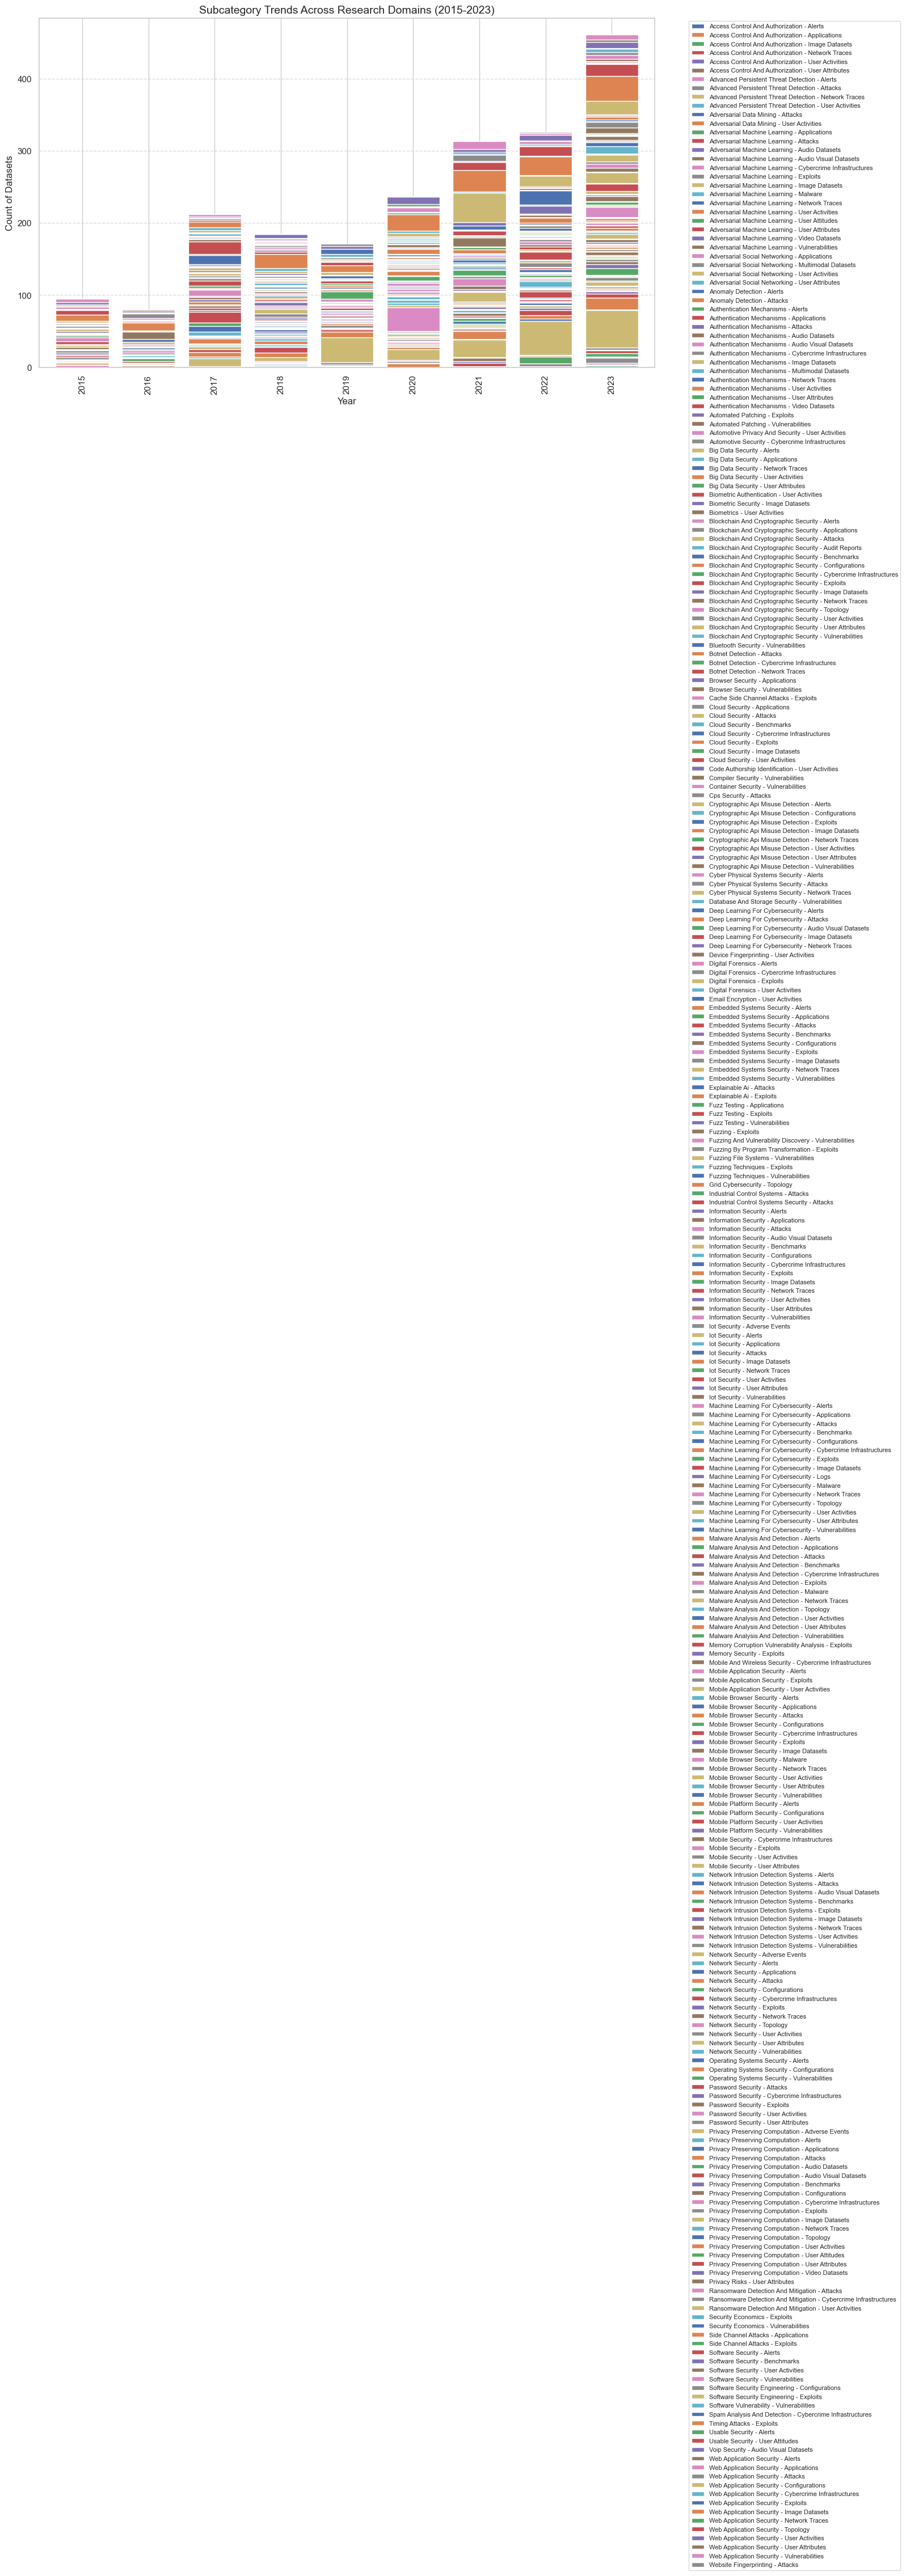

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to strictly normalize names
def strict_normalize_name(name):
    if not isinstance(name, str):
        return name
    name = name.strip().lower()
    name = name.replace("&", "and").replace("_", " ").replace("-", " ").replace("  ", " ")
    name = name.replace("user and organizational characteristics", "user organizational characteristics")
    return " ".join([word.capitalize() for word in name.split()])

# Load the CSV file
file_path = "top_10_combined_subcategory_trends.csv"  # Update for subcategory trends
df = pd.read_csv(file_path)

# Apply strict normalization to Research Domain and Subcategory columns
df["Research Domain"] = df["Research Domain"].apply(strict_normalize_name)
df["Subcategory"] = df["Subcategory"].apply(strict_normalize_name)

# Exclude data for the year 2024
df = df[df["Year"] != 2024]

# Pivot the data for plotting
pivot_table = df.pivot_table(
    values="Count",
    index="Year",
    columns=["Research Domain", "Subcategory"],
    aggfunc="sum",
    fill_value=0,
)

# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(14, 8))
pivot_table.plot(kind="bar", stacked=True, ax=ax, width=0.8)

# Add labels and titles
plt.title("Subcategory Trends Across Research Domains (2015-2023)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Count of Datasets", fontsize=12)

# Add legend with Research Domain and Subcategory
handles, labels = ax.get_legend_handles_labels()
legend_labels = [
    f"{domain} - {subcategory}" for domain, subcategory in pivot_table.columns
]
ax.legend(handles, legend_labels, bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=8)

# Improve layout
plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Save the plot as a PNG file
output_path = "normalized_subcategory_trends_across_domains_2015_2023.png"
plt.savefig(output_path, dpi=300, bbox_inches="tight")
print(f" Graph saved as {output_path}")

# Show the plot
plt.show()



Proportions of Dataset Types by Research Domain:

network security:
  Real-world: 43.24%
  Synthetic: 1.35%
  Hybrid: 2.03%
  Realistic: 52.03%
  Unknown: 1.35%

privacy preserving computation:
  Real-world: 88.61%
  Realistic: 11.39%

machine learning for cybersecurity:
  Realistic: 10.14%
  Real-world: 87.16%
  Synthetic: 0.68%
  Hybrid: 2.03%

botnet detection:
  Real-world: 62.50%
  Realistic: 37.50%

web application security:
  Realistic: 32.35%
  Real-world: 65.88%
  Synthetic: 1.76%

mobile security:
  Real-world: 80.00%
  Synthetic: 20.00%

privacy-preserving computation:
  Realistic: 9.59%
  Real-world: 85.23%
  Synthetic: 4.15%
  Hybrid: 0.52%
  Unknown: 0.52%

iot security:
  Real-world: 66.67%
  Realistic: 33.33%

information security:
  Real-world: 71.72%
  Realistic: 28.28%

cryptographic api misuse detection:
  Realistic: 13.43%
  Real-world: 85.07%
  Synthetic: 1.49%

cyber threat intelligence:
  Real-world: 50.00%
  Realistic: 50.00%

email encryption:
  Real-world: 1

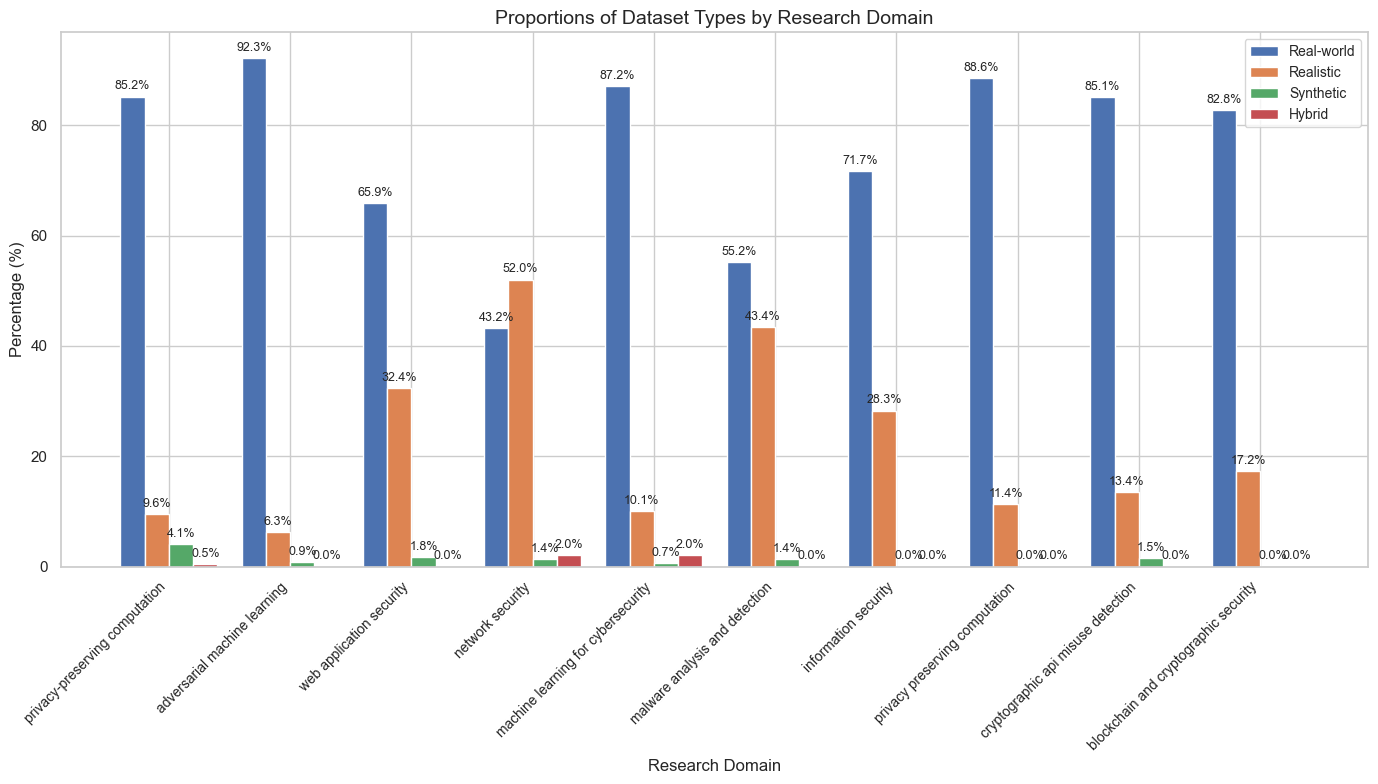

In [31]:
import json
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
import numpy as np

def calculate_dataset_proportions_by_domain(file_path):
    domain_data = defaultdict(lambda: Counter())
    total_counts_by_domain = defaultdict(int)

    # Read the JSONL file
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            try:
                paper = json.loads(line.strip())
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON line: {e}")
                continue

            for _, details in paper.items():
                # Extract research domain
                domain_field = details.get('domain')
                if domain_field:
                    try:
                        cleaned_domain = domain_field.strip('```json').strip('```').strip()
                        domain_json = json.loads(cleaned_domain)
                        domain = domain_json.get("research_domain", "Unknown")
                    except json.JSONDecodeError:
                        domain = "Unknown"
                else:
                    domain = "Unknown"

                # Process dataset_analysis_combined field
                dataset_analysis_combined_field = details.get('dataset_analysis_combined')
                if dataset_analysis_combined_field:
                    try:
                        cleaned_analysis = dataset_analysis_combined_field.strip('```json').strip('```').strip()
                        analysis_json = json.loads(cleaned_analysis)

                        # Safeguard against NoneType
                        if not isinstance(analysis_json.get("dataset_analysis_combined"), list):
                            continue

                        for analysis in analysis_json.get("dataset_analysis_combined", []):
                            dataset_type = analysis.get("dataset_type", "Unknown").lower()

                            # Count each dataset type for the specific domain
                            domain_data[domain][dataset_type] += 1
                            total_counts_by_domain[domain] += 1
                    except json.JSONDecodeError as e:
                        print(f"Error decoding dataset_analysis_combined: {e}")

    # Calculate proportions
    proportions_by_domain = {}
    for domain, counts in domain_data.items():
        total = total_counts_by_domain[domain]
        proportions_by_domain[domain] = {
            dataset_type: (count / total) * 100 for dataset_type, count in counts.items()
        }

    return proportions_by_domain, domain_data

def plot_dataset_proportions(proportions_by_domain, domain_data, save_path='dataset_proportions_by_domain.png'):
    dataset_types = ['real-world', 'realistic', 'synthetic', 'hybrid']
    top_domains = sorted(domain_data.keys(), key=lambda d: sum(domain_data[d].values()), reverse=True)[:10]

    # Prepare data for plotting
    proportions = {dtype: [proportions_by_domain[domain].get(dtype, 0) for domain in top_domains] for dtype in dataset_types}
    x = np.arange(len(top_domains))  # The label locations
    width = 0.2  # The width of the bars

    # Create grouped bar plot
    fig, ax = plt.subplots(figsize=(14, 8))
    bars = []
    for i, dtype in enumerate(dataset_types):
        bars.append(
            ax.bar(x + i * width, proportions[dtype], width, label=dtype.capitalize())
        )

    # Add labels, title, and legend
    ax.set_xlabel('Research Domain', fontsize=12)
    ax.set_ylabel('Percentage (%)', fontsize=12)
    ax.set_title('Proportions of Dataset Types by Research Domain', fontsize=14)
    ax.set_xticks(x + width * (len(dataset_types) - 1) / 2)
    ax.set_xticklabels(top_domains, rotation=45, ha='right', fontsize=10)
    ax.legend(fontsize=10)

    # Add percentage labels above bars
    for bar_group in bars:
        for bar in bar_group:
            height = bar.get_height()
            ax.annotate(f'{height:.1f}%',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # Offset text by 3 points
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=9)

    # Adjust layout for better fit
    plt.tight_layout()

    # Save the figure
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"Chart saved as: {save_path}")

    # Show the figure
    plt.show()

# Main script
file_path = 'results_final_2.0.jsonl'

# Calculate proportions and domain data
proportions_by_domain, domain_data = calculate_dataset_proportions_by_domain(file_path)

# Print the proportions
print("\nProportions of Dataset Types by Research Domain:")
for domain, proportions in proportions_by_domain.items():
    print(f"\n{domain}:")
    for dataset_type, percentage in proportions.items():
        print(f"  {dataset_type.capitalize()}: {percentage:.2f}%")

# Plot the proportions
plot_dataset_proportions(proportions_by_domain, domain_data, save_path='dataset_proportions_by_domain.png')


Proportion of dataset type in domains


Proportions of Dataset Types by Top 10 Research Domains:

privacy preserving computation:
  Real-world: 85.81%
  Realistic: 9.89%
  Synthetic: 3.44%
  Hybrid: 0.43%
  Unknown: 0.43%

adversarial machine learning:
  Real-world: 92.26%
  Realistic: 6.30%
  Unknown: 0.57%
  Synthetic: 0.86%

web application security:
  Realistic: 32.35%
  Real-world: 65.88%
  Synthetic: 1.76%

network security:
  Real-world: 43.24%
  Synthetic: 1.35%
  Hybrid: 2.03%
  Realistic: 52.03%
  Unknown: 1.35%

machine learning for cybersecurity:
  Realistic: 10.14%
  Real-world: 87.16%
  Synthetic: 0.68%
  Hybrid: 2.03%

malware analysis and detection:
  Realistic: 43.45%
  Real-world: 55.17%
  Synthetic: 1.38%

information security:
  Real-world: 71.72%
  Realistic: 28.28%

cryptographic api misuse detection:
  Realistic: 13.43%
  Real-world: 85.07%
  Synthetic: 1.49%

blockchain and cryptographic security:
  Real-world: 82.76%
  Realistic: 17.24%

password security:
  Real-world: 97.87%
  Realistic: 2.13%
Cha

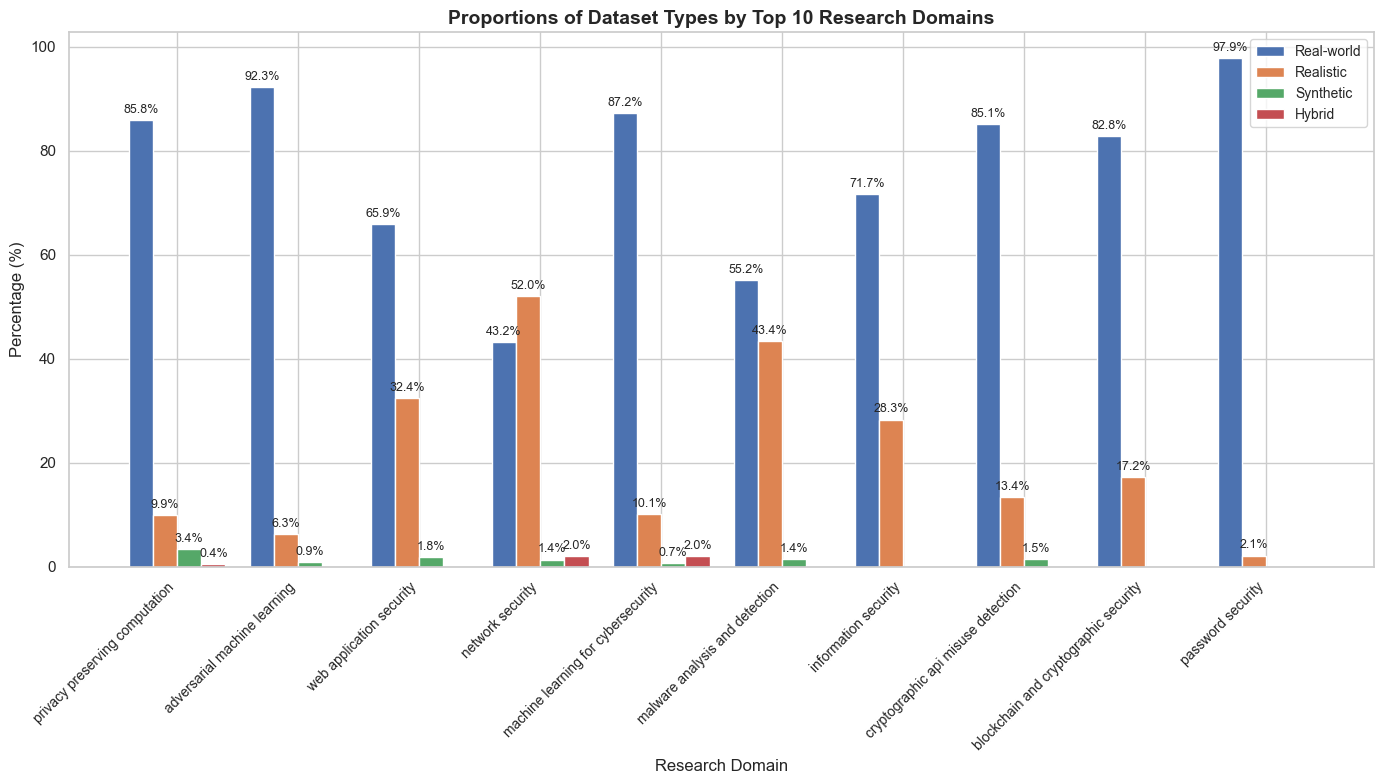

In [66]:
import json
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
import numpy as np

def normalize_domain_name(domain):
    """Normalize domain names to treat variations as the same."""
    return domain.lower().replace("-", " ").strip()

def calculate_dataset_proportions_by_domain(file_path):
    domain_data = defaultdict(lambda: Counter())
    total_counts_by_domain = defaultdict(int)

    # Read the JSONL file
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            try:
                paper = json.loads(line.strip())
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON line: {e}")
                continue

            for _, details in paper.items():
                # Extract and normalize research domain
                domain_field = details.get('domain')
                if domain_field:
                    try:
                        cleaned_domain = domain_field.strip('```json').strip('```').strip()
                        domain_json = json.loads(cleaned_domain)
                        domain = normalize_domain_name(domain_json.get("research_domain", "Unknown"))
                    except json.JSONDecodeError:
                        domain = "unknown"
                else:
                    domain = "unknown"

                # Process dataset_analysis_combined field
                dataset_analysis_combined_field = details.get('dataset_analysis_combined')
                if dataset_analysis_combined_field:
                    try:
                        cleaned_analysis = dataset_analysis_combined_field.strip('```json').strip('```').strip()
                        analysis_json = json.loads(cleaned_analysis)

                        # Safeguard against NoneType
                        if not isinstance(analysis_json.get("dataset_analysis_combined"), list):
                            continue

                        for analysis in analysis_json.get("dataset_analysis_combined", []):
                            dataset_type = analysis.get("dataset_type", "Unknown").lower()

                            # Count each dataset type for the specific domain
                            domain_data[domain][dataset_type] += 1
                            total_counts_by_domain[domain] += 1
                    except json.JSONDecodeError as e:
                        print(f"Error decoding dataset_analysis_combined: {e}")

    # Calculate proportions
    proportions_by_domain = {}
    for domain, counts in domain_data.items():
        total = total_counts_by_domain[domain]
        proportions_by_domain[domain] = {
            dataset_type: (count / total) * 100 for dataset_type, count in counts.items()
        }

    return proportions_by_domain, domain_data

def plot_dataset_proportions(proportions_by_domain, domain_data, save_path='dataset_proportions_by_top10_domains.png'):
    dataset_types = ['real-world', 'realistic', 'synthetic', 'hybrid']
    # Get top 10 domains by total dataset count
    top_domains = sorted(domain_data.keys(), key=lambda d: sum(domain_data[d].values()), reverse=True)[:10]

    # Prepare data for plotting
    proportions = {dtype: [proportions_by_domain[domain].get(dtype, 0) for domain in top_domains] for dtype in dataset_types}
    x = np.arange(len(top_domains))  # The label locations
    width = 0.2  # The width of the bars

    # Create grouped bar plot
    fig, ax = plt.subplots(figsize=(14, 8))
    bars = []
    for i, dtype in enumerate(dataset_types):
        bars.append(
            ax.bar(x + i * width, proportions[dtype], width, label=dtype.capitalize())
        )

    # Add labels, title, and legend
    ax.set_xlabel('Research Domain', fontsize=12)
    ax.set_ylabel('Percentage (%)', fontsize=12)
    ax.set_title('Proportions of Dataset Types by Top 10 Research Domains', fontsize=14, fontweight='bold')
    ax.set_xticks(x + width * (len(dataset_types) - 1) / 2)
    ax.set_xticklabels(top_domains, rotation=45, ha='right', fontsize=10)
    ax.legend(fontsize=10)

    # Add percentage labels above bars
    for bar_group in bars:
        for bar in bar_group:
            height = bar.get_height()
            if height > 0:  # Avoid labels for zero height bars
                ax.annotate(f'{height:.1f}%',
                            xy=(bar.get_x() + bar.get_width() / 2, height),
                            xytext=(0, 3),  # Offset text by 3 points
                            textcoords="offset points",
                            ha='center', va='bottom', fontsize=9)

    # Adjust layout for better fit
    plt.tight_layout()

    # Save the figure
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"Chart saved as: {save_path}")

    # Show the figure
    plt.show()

# Main script
file_path = 'results_final_2.0.jsonl'

# Calculate proportions and domain data
proportions_by_domain, domain_data = calculate_dataset_proportions_by_domain(file_path)

# Print the proportions
print("\nProportions of Dataset Types by Top 10 Research Domains:")
for domain, proportions in sorted(proportions_by_domain.items(), key=lambda x: sum(domain_data[x[0]].values()), reverse=True)[:10]:
    print(f"\n{domain}:")
    for dataset_type, percentage in proportions.items():
        print(f"  {dataset_type.capitalize()}: {percentage:.2f}%")

# Plot the proportions for top 10 domains
plot_dataset_proportions(proportions_by_domain, domain_data)


DATASET CLEANING

All DATASETs

UNIQUE DATASETs- REMOVING REPEATATION

In [34]:
import json
import csv
import re

def normalize_dataset_name(name):
    """Normalize dataset names by removing special characters, converting to lowercase, etc."""
    return re.sub(r'[-\s]', '', name.lower())

def extract_unique_datasets_with_types(file_path, output_file_csv, output_file_json, unique_file_csv, unique_file_json):
    datasets = []
    unique_datasets = []

    def is_cve_name(name):
        """Check if a name matches the CVE pattern."""
        return re.match(r'^CVE-\d{4}-\d+$', name)

    # List of proprietary datasets to exclude
    exclude_proprietary_datasets = {
        "famisafe", "findmykids", "kidoz", "kidsplace",
        "kidcontrol", "life360", "mmguardian", "mobilefence",
        "qustodio", "secureteen"
    }

    seen_datasets = set()  # To track unique normalized datasets

    # Read the JSONL file
    with open(file_path, 'r', encoding='utf-8') as file:
        for line_number, line in enumerate(file, 1):
            try:
                paper = json.loads(line.strip())
            except json.JSONDecodeError as e:
                print(f"[Line {line_number}] Error decoding JSON: {e}")
                continue

            # Process dataset-related information
            for _, details in paper.items():
                dataset_name_field = details.get('dataset_name')
                dataset_analysis_combined_field = details.get('dataset_analysis_combined')
                if dataset_name_field and dataset_analysis_combined_field:
                    try:
                        # Parse dataset_name JSON
                        cleaned_dataset_name = dataset_name_field.strip('```json').strip('```').strip()
                        dataset_name_json = json.loads(cleaned_dataset_name)

                        # Parse dataset_analysis_combined JSON
                        cleaned_analysis = dataset_analysis_combined_field.strip('```json').strip('```').strip()
                        analysis_json = json.loads(cleaned_analysis)

                        datasets_in_paper = dataset_name_json.get("datasets", [])
                        analysis_data = analysis_json.get("dataset_analysis_combined", [])
                        if datasets_in_paper and analysis_data:
                            for dataset, analysis in zip(datasets_in_paper, analysis_data):
                                dataset_name = dataset.get("dataset_name", "Unknown")
                                availability = analysis.get("availability", "Unknown")
                                dataset_type = analysis.get("dataset_type", "Unknown")
                                labeling_type = analysis.get("labeling_type", "Unknown")

                                normalized_name = normalize_dataset_name(dataset_name)

                                # Skip CVE entries, synthetic availability, and excluded proprietary datasets
                                if is_cve_name(dataset_name) or availability.lower() == "synthetic":
                                    continue
                                if availability.lower() == "proprietary" and normalized_name in exclude_proprietary_datasets:
                                    continue

                                # Check for uniqueness
                                is_repeated = "Yes" if normalized_name in seen_datasets else "No"
                                if availability == "public":
                                    seen_datasets.add(normalized_name)

                                # Add dataset details
                                datasets.append({
                                    "dataset_name": dataset_name,
                                    "availability": availability,
                                    "dataset_type": dataset_type,
                                    "labeling_type": labeling_type,
                                    "repeated": is_repeated
                                })

                                # Only add unique datasets to the unique_datasets list
                                if is_repeated == "No":
                                    unique_datasets.append({
                                        "dataset_name": dataset_name,
                                        "availability": availability,
                                        "dataset_type": dataset_type,
                                        "labeling_type": labeling_type
                                    })
                    except json.JSONDecodeError as e:
                        print(f"[Line {line_number}] Error decoding dataset or analysis JSON: {e}. Raw data: {line.strip()}")

    # Write all datasets to CSV
    with open(output_file_csv, 'w', encoding='utf-8', newline='') as csvfile:
        fieldnames = ["dataset_name", "availability", "dataset_type", "labeling_type", "repeated"]
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(datasets)

    # Write unique datasets to a separate CSV
    with open(unique_file_csv, 'w', encoding='utf-8', newline='') as csvfile:
        fieldnames = ["dataset_name", "availability", "dataset_type", "labeling_type"]
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(unique_datasets)

    # Write all datasets to JSON
    with open(output_file_json, 'w', encoding='utf-8') as jsonfile:
        json.dump(datasets, jsonfile, indent=4)

    # Write unique datasets to a separate JSON with the new file name
    with open(unique_file_json, 'w', encoding='utf-8') as jsonfile:
        json.dump(unique_datasets, jsonfile, indent=4)

    print(f"Extracted {len(datasets)} datasets from dataset-related papers, excluding synthetic datasets from availability and specified proprietary datasets.")
    print(f"Saved all datasets to {output_file_csv} and {output_file_json}.")
    print(f"Saved unique datasets to {unique_file_csv} and {unique_file_json}.")
    return datasets, unique_datasets

# **Updated File Paths**
file_path = 'results_final_2.0.jsonl'  # Your input JSONL file
output_file_csv = 'extracted_datasets_with_availability.csv'  # Output CSV file for all datasets
output_file_json = 'extracted_datasets_with_availability.json'  # Output JSON file for all datasets
unique_file_csv = 'unique_datasets_2.0.csv'  # Output CSV file for unique datasets
unique_file_json = 'unique_datasets_2.0.json' 

# **Run the extraction**
extracted_datasets, unique_datasets = extract_unique_datasets_with_types(
    file_path, output_file_csv, output_file_json, unique_file_csv, unique_file_json
)


[Line 50] Error decoding dataset or analysis JSON: Expecting ',' delimiter: line 8 column 63 (char 277). Raw data: {"Revisiting Fuzzy Signatures: Towards a More Risk-Free": {"title": "{\n    \"title\": \"Revisiting Fuzzy Signatures: Towards a More Risk-Free Cryptographic Authentication System based on Biometrics\"\n}", "authors_name": "```json\n{\n    \"authors\": \"Shuichi Katsumata, Takahiro Matsuda, Wataru Nakamura, Kazuma Ohara, Kenta Takahashi\"\n}\n```", "conference_name": "```json\n{\n    \"conference\": \"CCS\"\n}\n```", "published_year": "```json\n{\n    \"year\": \"2021\"\n}\n```", "school_institution": "{\n    \"school\": \"AIST, Hitachi, Ltd\"\n}", "domain": "```json\n{\n    \"research_domain\": \"authentication mechanisms\"\n}\n```", "dataset_name": "```json\n{\n    \"datasets\": [\n        {\n            \"unique_id\": \"null\",\n            \"dataset_name\": \"Finger-vein dataset\",\n            \"contributors\": \"Takashio Yanagawa, Satoshi Aoki, Tetsuji Oyama\",\n     

In [44]:
import json
import csv
import re

def extract_unique_datasets(file_path, output_file_csv, output_file_json, unique_file_csv, unique_file_json):
    datasets = []
    unique_datasets = []

    def normalize_dataset_name(name):
        """Normalize dataset names by removing special characters, converting to lowercase, etc."""
        return re.sub(r'[-\s]', '', name.lower())

    def is_cve_name(name):
        """Check if a name matches the CVE pattern."""
        return re.match(r'^CVE-\d{4}-\d+$', name)

    seen_datasets = set()  # To track unique normalized public datasets

    # Read the JSONL file
    with open(file_path, 'r', encoding='utf-8') as file:
        for line_number, line in enumerate(file, 1):
            try:
                paper = json.loads(line.strip())
            except json.JSONDecodeError as e:
                print(f"[Line {line_number}] Error decoding JSON: {e}")
                continue

            # Process dataset-related information
            for _, details in paper.items():
                dataset_name_field = details.get('dataset_name')
                dataset_analysis_combined_field = details.get('dataset_analysis_combined')
                if dataset_name_field and dataset_analysis_combined_field:
                    try:
                        # Parse dataset_name JSON
                        cleaned_dataset_name = dataset_name_field.strip('```json').strip('```').strip()
                        dataset_name_json = json.loads(cleaned_dataset_name)

                        # Parse dataset_analysis_combined JSON
                        cleaned_analysis = dataset_analysis_combined_field.strip('```json').strip('```').strip()
                        analysis_json = json.loads(cleaned_analysis)

                        datasets_in_paper = dataset_name_json.get("datasets", [])
                        analysis_data = analysis_json.get("dataset_analysis_combined", [])
                        if datasets_in_paper and analysis_data:
                            for dataset, analysis in zip(datasets_in_paper, analysis_data):
                                dataset_name = dataset.get("dataset_name", "Unknown")
                                availability = analysis.get("availability", "Unknown")

                                # Skip CVE entries
                                if is_cve_name(dataset_name):
                                    continue

                                normalized_name = normalize_dataset_name(dataset_name)

                                # Check for uniqueness for public datasets
                                is_repeated = "Yes" if normalized_name in seen_datasets else "No"
                                if availability == "public":
                                    seen_datasets.add(normalized_name)

                                # Add dataset details
                                datasets.append({
                                    "dataset_name": dataset_name,
                                    "availability": availability,
                                    "repeated": is_repeated
                                })

                                # Only add unique datasets to the unique_datasets list
                                if is_repeated == "No":
                                    unique_datasets.append({
                                        "dataset_name": dataset_name,
                                        "availability": availability
                                    })
                    except json.JSONDecodeError as e:
                        print(f"[Line {line_number}] Error decoding dataset or analysis JSON: {e}. Raw data: {line.strip()}")

    # Write all datasets to CSV
    with open(output_file_csv, 'w', encoding='utf-8', newline='') as csvfile:
        fieldnames = ["dataset_name", "availability", "repeated"]
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(datasets)

    # Write unique datasets to a separate CSV
    with open(unique_file_csv, 'w', encoding='utf-8', newline='') as csvfile:
        fieldnames = ["dataset_name", "availability"]
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(unique_datasets)

    # Write all datasets to JSON
    with open(output_file_json, 'w', encoding='utf-8') as jsonfile:
        json.dump(datasets, jsonfile, indent=4)

    # Write unique datasets to a separate JSON
    with open(unique_file_json, 'w', encoding='utf-8') as jsonfile:
        json.dump(unique_datasets, jsonfile, indent=4)

    print(f"Extracted {len(datasets)} datasets from dataset-related papers.")
    print(f"Saved all datasets to {output_file_csv} and {output_file_json}.")
    print(f"Saved unique datasets to {unique_file_csv} and {unique_file_json}.")
    return datasets, unique_datasets

# File paths
file_path = 'results_final_2.0.jsonl'  # Your input JSONL file
output_file_csv = 'extracted_datasets_with_availability.csv'  # Output CSV file for all datasets
output_file_json = 'extracted_datasets_with_availability.json'  # Output JSON file for all datasets
unique_file_csv = 'unique_datasets_2.0.csv'  # Output CSV file for unique datasets
unique_file_json = 'unique_datasets_2.0.json'  # Output JSON file for unique datasets

# Run the extraction
extracted_datasets, unique_datasets = extract_unique_datasets(
    file_path, output_file_csv, output_file_json, unique_file_csv, unique_file_json
)


[Line 50] Error decoding dataset or analysis JSON: Expecting ',' delimiter: line 8 column 63 (char 277). Raw data: {"Revisiting Fuzzy Signatures: Towards a More Risk-Free": {"title": "{\n    \"title\": \"Revisiting Fuzzy Signatures: Towards a More Risk-Free Cryptographic Authentication System based on Biometrics\"\n}", "authors_name": "```json\n{\n    \"authors\": \"Shuichi Katsumata, Takahiro Matsuda, Wataru Nakamura, Kazuma Ohara, Kenta Takahashi\"\n}\n```", "conference_name": "```json\n{\n    \"conference\": \"CCS\"\n}\n```", "published_year": "```json\n{\n    \"year\": \"2021\"\n}\n```", "school_institution": "{\n    \"school\": \"AIST, Hitachi, Ltd\"\n}", "domain": "```json\n{\n    \"research_domain\": \"authentication mechanisms\"\n}\n```", "dataset_name": "```json\n{\n    \"datasets\": [\n        {\n            \"unique_id\": \"null\",\n            \"dataset_name\": \"Finger-vein dataset\",\n            \"contributors\": \"Takashio Yanagawa, Satoshi Aoki, Tetsuji Oyama\",\n     


Availability counts and percentages:
public: 990 (59.78%)
custom-created datasets, not shared: 336 (20.29%)
custom-created datasets but public: 289 (17.45%)
restricted: 22 (1.33%)
unknown: 4 (0.24%)
proprietary: 15 (0.91%)

Dataset type counts and percentages:
real-world: 1164 (70.29%)
synthetic: 34 (2.05%)
realistic: 452 (27.29%)
hybrid: 2 (0.12%)
unknown: 4 (0.24%)

Labeling type counts and percentages:
labeled: 1350 (81.52%)
not mentioned: 235 (14.19%)
unlabeled: 67 (4.05%)
unknown: 4 (0.24%)

Saved combined summary graph as summary_graph.png.


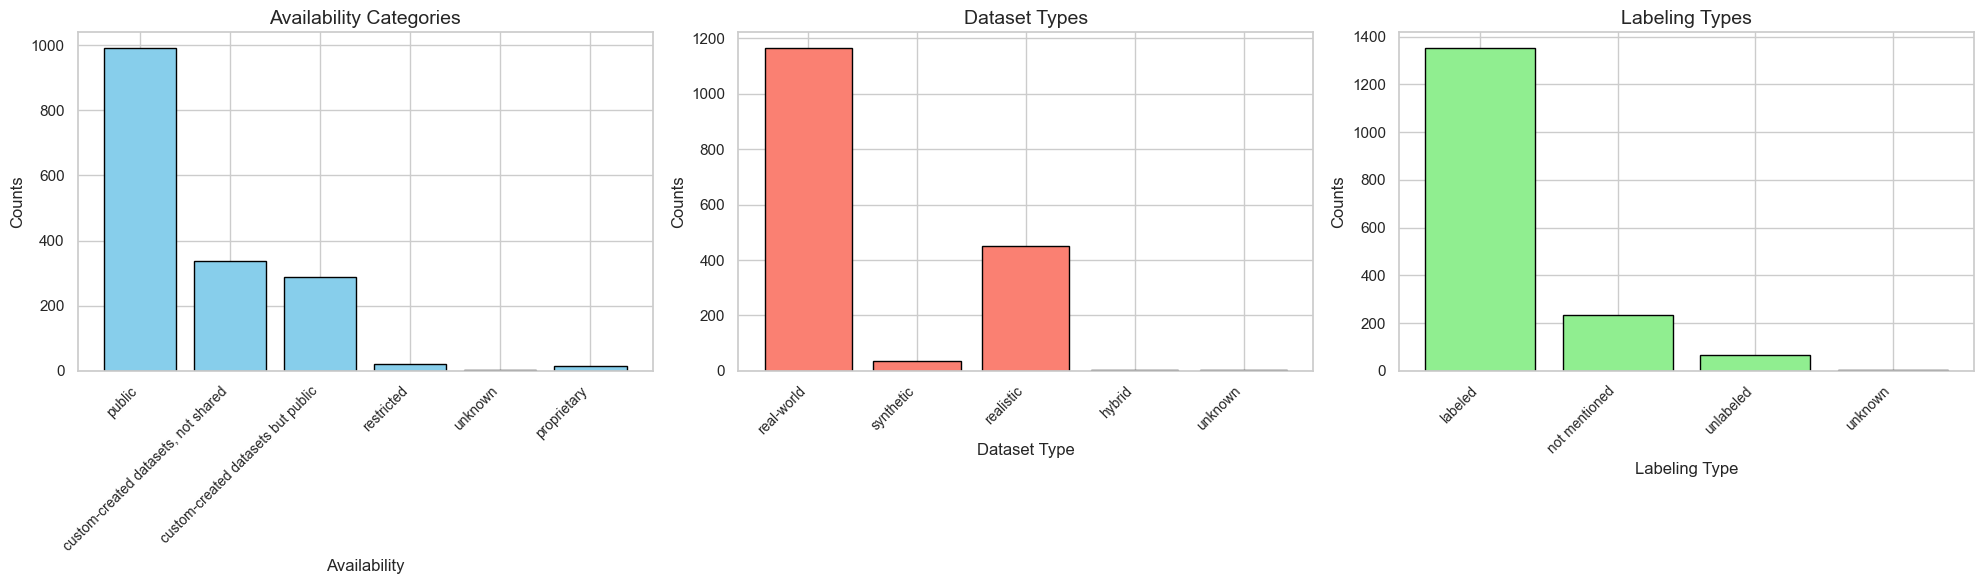

In [68]:
import json
import csv
import re
import matplotlib.pyplot as plt
from collections import Counter

def normalize_labeling_type(labeling_type):
    """Normalize labeling types to handle case differences and duplicates."""
    normalized = labeling_type.lower().strip()
    if normalized in ['labeled', 'labeled (via url)']:
        return 'labeled'
    elif normalized in ['not mentioned', 'Not Mentioned', 'Not mentioned']:
        return 'not mentioned'
    elif normalized == 'unlabeled':
        return 'unlabeled'
    else:
        return 'unknown'

def analyze_and_visualize(file_path, output_graph_file='summary_graph.png'):
    # Load the unique datasets CSV
    data = pd.read_csv(file_path)

    # Normalize labeling types
    data['labeling_type'] = data['labeling_type'].apply(normalize_labeling_type)

    # Analyze availability
    availability_counts = Counter(data['availability'])
    availability_percentages = {k: (v / len(data)) * 100 for k, v in availability_counts.items()}

    # Analyze dataset type
    dataset_type_counts = Counter(data['dataset_type'])
    dataset_type_percentages = {k: (v / len(data)) * 100 for k, v in dataset_type_counts.items()}

    # Analyze labeling type
    labeling_type_counts = Counter(data['labeling_type'])
    labeling_type_percentages = {k: (v / len(data)) * 100 for k, v in labeling_type_counts.items()}

    # Print counts and percentages
    print("\nAvailability counts and percentages:")
    for k, v in availability_counts.items():
        print(f"{k}: {v} ({availability_percentages[k]:.2f}%)")

    print("\nDataset type counts and percentages:")
    for k, v in dataset_type_counts.items():
        print(f"{k}: {v} ({dataset_type_percentages[k]:.2f}%)")

    print("\nLabeling type counts and percentages:")
    for k, v in labeling_type_counts.items():
        print(f"{k}: {v} ({labeling_type_percentages[k]:.2f}%)")

    # Generate graphs
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))

    # Availability graph
    axes[0].bar(availability_counts.keys(), availability_counts.values(), color='skyblue', edgecolor='black')
    axes[0].set_title('Availability Categories', fontsize=14)
    axes[0].set_ylabel('Counts', fontsize=12)
    axes[0].set_xlabel('Availability', fontsize=12)
    axes[0].set_xticks(range(len(availability_counts)))
    axes[0].set_xticklabels(availability_counts.keys(), rotation=45, ha='right', fontsize=10)

    # Dataset type graph
    axes[1].bar(dataset_type_counts.keys(), dataset_type_counts.values(), color='salmon', edgecolor='black')
    axes[1].set_title('Dataset Types', fontsize=14)
    axes[1].set_ylabel('Counts', fontsize=12)
    axes[1].set_xlabel('Dataset Type', fontsize=12)
    axes[1].set_xticks(range(len(dataset_type_counts)))
    axes[1].set_xticklabels(dataset_type_counts.keys(), rotation=45, ha='right', fontsize=10)

    # Labeling type graph
    axes[2].bar(labeling_type_counts.keys(), labeling_type_counts.values(), color='lightgreen', edgecolor='black')
    axes[2].set_title('Labeling Types', fontsize=14)
    axes[2].set_ylabel('Counts', fontsize=12)
    axes[2].set_xlabel('Labeling Type', fontsize=12)
    axes[2].set_xticks(range(len(labeling_type_counts)))
    axes[2].set_xticklabels(labeling_type_counts.keys(), rotation=45, ha='right', fontsize=10)

    plt.tight_layout()

    # Save the summary graph as an image
    plt.savefig(output_graph_file, dpi=300, bbox_inches='tight')
    print(f"\nSaved combined summary graph as {output_graph_file}.")

    # Show the graph
    plt.show()

# File path
file_path = 'unique_datasets_2.0.csv'  # Input CSV file for unique datasets

# Analyze and visualize
analyze_and_visualize(file_path, output_graph_file='summary_graph.png')


In [46]:
import json
import csv
import re

def normalize_dataset_name(name):
    """Normalize dataset names by removing special characters, converting to lowercase, etc."""
    return re.sub(r'[-\s]', '', name.lower())

def normalize_category_or_subcategory(value, mapping=None):
    """Normalize categories and subcategories, combining similar entries."""
    if not value or value.lower() == "null":
        return "unknown"
    normalized_value = value.lower()
    if mapping and normalized_value in mapping:
        return mapping[normalized_value]
    return normalized_value

def extract_unique_datasets_with_types(file_path, output_file_csv, output_file_json, unique_file_csv, unique_file_json):
    datasets = []
    unique_datasets = []

    def is_cve_name(name):
        """Check if a name matches the CVE pattern."""
        return re.match(r'^CVE-\d{4}-\d+$', name)

    # List of proprietary datasets to exclude, because model it wrongly
    exclude_proprietary_datasets = {
        "famisafe", "findmykids", "kidoz", "kidsplace",
        "kidcontrol", "life360", "mmguardian", "mobilefence",
        "qustodio", "secureteen"
    }

    # Mappings for normalizing categories and subcategories
    category_mapping = {
        "macro_internet": "macro_level_internet_characteristics",
        "macro_internet_characteristics": "macro_level_internet_characteristics",
    }
    subcategory_mapping = {
        "malware": "attacks",
        "malicious": "attacks"
    }

    seen_datasets = set()  # To track unique normalized datasets

    # Read the JSONL file
    with open(file_path, 'r', encoding='utf-8') as file:
        for line_number, line in enumerate(file, 1):
            try:
                paper = json.loads(line.strip())
            except json.JSONDecodeError as e:
                print(f"[Line {line_number}] Error decoding JSON: {e}")
                continue

            # Process dataset-related information
            for _, details in paper.items():
                dataset_name_field = details.get('dataset_name')
                dataset_analysis_combined_field = details.get('dataset_analysis_combined')
                dataset_categories_field = details.get('dataset_categories')  # For categories and subcategories
                if dataset_name_field and dataset_analysis_combined_field:
                    try:
                        # Parse dataset_name JSON
                        cleaned_dataset_name = dataset_name_field.strip('```json').strip('```').strip()
                        dataset_name_json = json.loads(cleaned_dataset_name)

                        # Parse dataset_analysis_combined JSON
                        cleaned_analysis = dataset_analysis_combined_field.strip('```json').strip('```').strip()
                        analysis_json = json.loads(cleaned_analysis)

                        # Parse dataset_categories JSON
                        categories = []
                        subcategories = []
                        if dataset_categories_field:
                            try:
                                cleaned_categories = dataset_categories_field.strip('```json').strip('```').strip()
                                categories_json = json.loads(cleaned_categories)
                                if categories_json and isinstance(categories_json.get("dataset_categories"), list):
                                    for entry in categories_json.get("dataset_categories", []):
                                        category = normalize_category_or_subcategory(entry.get("category", "unknown"), category_mapping)
                                        subcategory = normalize_category_or_subcategory(entry.get("subcategory", "unknown"), subcategory_mapping)
                                        categories.append(category)
                                        subcategories.append(subcategory)
                            except (json.JSONDecodeError, KeyError, TypeError):
                                pass  # Handle unexpected structures gracefully

                        datasets_in_paper = dataset_name_json.get("datasets", [])
                        analysis_data = analysis_json.get("dataset_analysis_combined", [])
                        if datasets_in_paper and analysis_data:
                            for dataset, analysis in zip(datasets_in_paper, analysis_data):
                                dataset_name = dataset.get("dataset_name", "Unknown")
                                availability = normalize_category_or_subcategory(analysis.get("availability", "unknown"))
                                dataset_type = normalize_category_or_subcategory(analysis.get("dataset_type", "unknown"))
                                labeling_type = normalize_category_or_subcategory(analysis.get("labeling_type", "unknown"))

                                normalized_name = normalize_dataset_name(dataset_name)

                                # Skip CVE entries, synthetic availability, and excluded proprietary datasets
                                if is_cve_name(dataset_name) or availability == "synthetic":
                                    continue
                                if availability == "proprietary" and normalized_name in exclude_proprietary_datasets:
                                    continue

                                # Check for uniqueness
                                is_repeated = "Yes" if normalized_name in seen_datasets else "No"
                                if availability == "public":
                                    seen_datasets.add(normalized_name)

                                # Add dataset details
                                datasets.append({
                                    "dataset_name": dataset_name,
                                    "availability": availability,
                                    "dataset_type": dataset_type,
                                    "labeling_type": labeling_type,
                                    "categories": ", ".join(set(categories)),
                                    "subcategories": ", ".join(set(subcategories)),
                                    "repeated": is_repeated
                                })

                                # Only add unique datasets to the unique_datasets list
                                if is_repeated == "No":
                                    unique_datasets.append({
                                        "dataset_name": dataset_name,
                                        "availability": availability,
                                        "dataset_type": dataset_type,
                                        "labeling_type": labeling_type,
                                        "categories": ", ".join(set(categories)),
                                        "subcategories": ", ".join(set(subcategories))
                                    })
                    except json.JSONDecodeError as e:
                        print(f"[Line {line_number}] Error decoding dataset or analysis JSON: {e}. Raw data: {line.strip()}")

    # Write all datasets to CSV
    with open(output_file_csv, 'w', encoding='utf-8', newline='') as csvfile:
        fieldnames = ["dataset_name", "availability", "dataset_type", "labeling_type", "categories", "subcategories", "repeated"]
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(datasets)

    # Write unique datasets to a separate CSV
    with open(unique_file_csv, 'w', encoding='utf-8', newline='') as csvfile:
        fieldnames = ["dataset_name", "availability", "dataset_type", "labeling_type", "categories", "subcategories"]
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(unique_datasets)

    # Write all datasets to JSON
    with open(output_file_json, 'w', encoding='utf-8') as jsonfile:
        json.dump(datasets, jsonfile, indent=4)

    # Write unique datasets to a separate JSON
    with open(unique_file_json, 'w', encoding='utf-8') as jsonfile:
        json.dump(unique_datasets, jsonfile, indent=4)

    print(f"Extracted {len(datasets)} datasets from dataset-related papers, excluding synthetic datasets from availability and specified proprietary datasets.")
    print(f"Saved all datasets to {output_file_csv} and {output_file_json}.")
    print(f"Saved unique datasets to {unique_file_csv} and {unique_file_json}.")
    return datasets, unique_datasets

# File paths
file_path = 'results_final_2.0.jsonl'  # Your input JSONL file
output_file_csv = 'extracted_datasets_with_availability.csv'  # Output CSV file for all datasets
output_file_json = 'extracted_datasets_with_availability.json'  # Output JSON file for all datasets
unique_file_csv = 'unique_datasets_2.0.csv'  # Output CSV file for unique datasets
unique_file_json = 'unique_datasets_2.0.json'  # Output JSON file for unique datasets

# Run the extraction
extracted_datasets, unique_datasets = extract_unique_datasets_with_types(
    file_path, output_file_csv, output_file_json, unique_file_csv, unique_file_json
)


[Line 50] Error decoding dataset or analysis JSON: Expecting ',' delimiter: line 8 column 63 (char 277). Raw data: {"Revisiting Fuzzy Signatures: Towards a More Risk-Free": {"title": "{\n    \"title\": \"Revisiting Fuzzy Signatures: Towards a More Risk-Free Cryptographic Authentication System based on Biometrics\"\n}", "authors_name": "```json\n{\n    \"authors\": \"Shuichi Katsumata, Takahiro Matsuda, Wataru Nakamura, Kazuma Ohara, Kenta Takahashi\"\n}\n```", "conference_name": "```json\n{\n    \"conference\": \"CCS\"\n}\n```", "published_year": "```json\n{\n    \"year\": \"2021\"\n}\n```", "school_institution": "{\n    \"school\": \"AIST, Hitachi, Ltd\"\n}", "domain": "```json\n{\n    \"research_domain\": \"authentication mechanisms\"\n}\n```", "dataset_name": "```json\n{\n    \"datasets\": [\n        {\n            \"unique_id\": \"null\",\n            \"dataset_name\": \"Finger-vein dataset\",\n            \"contributors\": \"Takashio Yanagawa, Satoshi Aoki, Tetsuji Oyama\",\n     

subcategories total count

In [32]:
import json
from collections import defaultdict
import pandas as pd

def load_data(file_path):
    """Load data from a JSONL file and return a list of dataset entries."""
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line_number, line in enumerate(file, 1):
            try:
                data.append(json.loads(line.strip()))  # Load each JSON object separately
            except json.JSONDecodeError as e:
                print(f" JSONDecodeError on line {line_number}: {e}")  # Debugging output
    return data

def extract_subcategories(data):
    """Extract and standardize subcategories for key dataset categories."""
    subcategory_counts = defaultdict(lambda: defaultdict(int))
    category_totals = defaultdict(int)  # To track total counts for each category

    relevant_categories = {
        "macro_level_internet_characteristics",
        "visual_and_multimedia_data",
        "defender_artifacts",
        "user_and_organizational_characteristics",
        "attacker_related",
    }

    for paper in data:
        for _, details in paper.items():
            dataset_categories_field = details.get("dataset_categories")
            if dataset_categories_field:
                try:
                    dataset_categories = json.loads(dataset_categories_field.strip("```json").strip("```").strip())
                    if dataset_categories and isinstance(dataset_categories.get("dataset_categories"), list):
                        for entry in dataset_categories.get("dataset_categories", []):
                            category = entry.get("category", "Unknown")
                            subcategory = entry.get("subcategory", "Unknown")
                            
                            # Ensure category is relevant
                            if category in relevant_categories:
                                # Move `malware` under `attacks`
                                if category == "attacker_related" and subcategory == "malware":
                                    subcategory_counts["attacker_related"]["attacks"] += 1
                                # Move `user_attributes` from `attacker_related` to `user_and_organizational_characteristics`
                                elif category == "attacker_related" and subcategory == "user_attributes":
                                    subcategory_counts["user_and_organizational_characteristics"]["user_attributes"] += 1
                                # Move `alerts` from `macro_level_internet_characteristics` to `defender_artifacts`
                                elif category == "macro_level_internet_characteristics" and subcategory == "alerts":
                                    subcategory_counts["defender_artifacts"]["alerts"] += 1
                                # Standardize similar subcategories for visual data
                                elif subcategory in {"audio-visual_datasets", "audio_datasets", "audio_visual_datasets"}:
                                    subcategory_counts["visual_and_multimedia_data"]["audio_visual_datasets"] += 1
                                # Move `logs` under `alerts`
                                elif subcategory == "logs":
                                    subcategory_counts["defender_artifacts"]["alerts"] += 1
                                # Move `audit_reports` under `configurations`
                                elif subcategory == "audit_reports":
                                    subcategory_counts["defender_artifacts"]["configurations"] += 1
                                # Move `benchmarks` from defender_artifacts to macro_level_internet_characteristics
                                elif category == "defender_artifacts" and subcategory == "benchmarks":
                                    subcategory_counts["macro_level_internet_characteristics"]["benchmarks"] += 1
                                elif category == "macro_level_internet_characteristics" and subcategory == "user_activities":
                                    subcategory_counts["user_and_organizational_characteristics"]["user_activities"] += 1
                                elif category == "attacker_related" and subcategory == "user_activities":
                                    subcategory_counts["user_and_organizational_characteristics"]["user_activities"] += 1
                                else:
                                    subcategory_counts[category][subcategory] += 1
                                category_totals[category] += 1  # Track total count for each category
                except (json.JSONDecodeError, AttributeError, TypeError):
                    continue

    return subcategory_counts, category_totals

# Main script
file_path = "results_final_2.0.jsonl"  
data = load_data(file_path)

# Extract subcategories with modifications
subcategory_counts, category_totals = extract_subcategories(data)

# Prepare data for CSV
all_subcategories_data = []
for category, subcategories in subcategory_counts.items():
    for subcategory, count in subcategories.items():
        all_subcategories_data.append({"Category": category, "Subcategory": subcategory, "Count": count})

# Save all subcategory counts to CSV
df = pd.DataFrame(all_subcategories_data)
output_csv = "all_subcategories_counts_fixed.csv"
df.to_csv(output_csv, index=False)

# Print results
print("\n All Subcategory Counts (Updated):")
for category, subcategories in subcategory_counts.items():
    print(f"\n Category: {category} (Total: {category_totals[category]})")
    for subcategory, count in subcategories.items():
        print(f" Subcategory: {subcategory}, Count: {count}")

print(f"\n Results also saved to {output_csv}")



 All Subcategory Counts (Updated):

 Category: attacker_related (Total: 709)
 Subcategory: attacks, Count: 228
 Subcategory: exploits, Count: 148
 Subcategory: cybercrime_infrastructures, Count: 137
 Subcategory: vulnerabilities, Count: 175

 Category: user_and_organizational_characteristics (Total: 553)
 Subcategory: user_activities, Count: 436
 Subcategory: user_attributes, Count: 134
 Subcategory: user_attitudes, Count: 5

 Category: macro_level_internet_characteristics (Total: 335)
 Subcategory: network_traces, Count: 133
 Subcategory: topology, Count: 14
 Subcategory: benchmarks, Count: 28
 Subcategory: applications, Count: 155
 Subcategory: adverse_events, Count: 4

 Category: defender_artifacts (Total: 152)
 Subcategory: alerts, Count: 105
 Subcategory: configurations, Count: 46
 Subcategory: user_activities, Count: 1

 Category: visual_and_multimedia_data (Total: 393)
 Subcategory: image_datasets, Count: 351
 Subcategory: audio_visual_datasets, Count: 26
 Subcategory: video_da